In [12]:
import json
import numpy as np
import pandas as pd
from pathlib import Path
import os
import sys
import warnings
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter('ignore')

sys.path.append('../../utilities')
sys.path.append('../../models/grt123')
sys.path.append('../../models/grt123/training')
sys.path.append('../../models/grt123/preprocessing/')

# from layers import nms,iou
from summit_utils import *
from evaluation import noduleCADEvaluation

workspace_path = Path(os.getcwd()).parent.parent


# Male Only

In [13]:
dataset_name = 'white_only'

## GRT123

/Users/john/Projects/SOTAEvaluationNoduleDetection/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_metadata.csv
Total number of included nodule annotations: 1218
Total number of nodule annotations: 1218
Cases: 899


100%|██████████| 1000/1000 [00:27<00:00, 35.87it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.17      0.14       0.20
159   0.25       0.24      0.21       0.27
476   0.50       0.33      0.29       0.36
1111  1.00       0.46      0.42       0.49
2381  2.00       0.59      0.56       0.62
4920  4.00       0.72      0.69       0.75
9999  8.00       0.81      0.79       0.84

Mean Sensitivity: 0.47 Low Sensitivity: 0.44 High Sensitivity: 0.5


True positives       1055
0                                    False positives  18075.000
1                                    False negatives    163.000
2                                     True negatives      0.000
3                         Total number of candidates  19159.000
4                            Total number of nodules   1218.000
5             Ignored candidates on excluded nodules      0.000
6      Ignored candidates which were double detec...     29.000
7                                        Sensitivity      0.866
8              Average number of candidates per scan     21.311

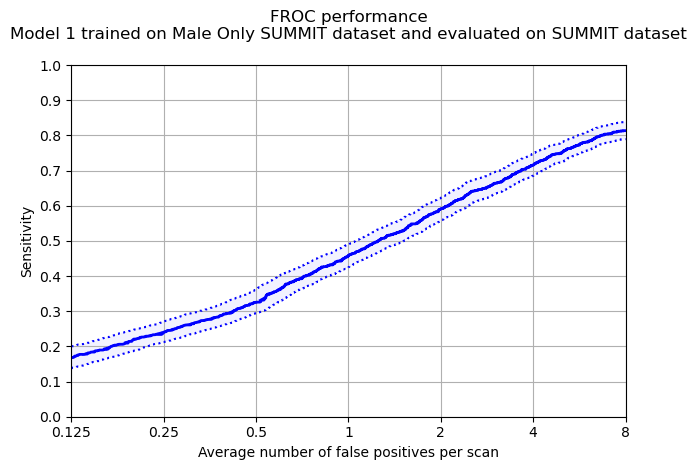

In [14]:
# Add in diameter cuts for later analysis
annotations = pd.read_csv(f'{workspace_path}/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_metadata.csv')
annotations['diameter_cats'] = pd.cut(
    annotations['diameter_mm'],
    bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 999],
    labels=['1. 0-5', '2. 5-10', '3. 10-15', '4. 15-20', '5. 20-25', '6. 25-30', '7. 30-35', '8. 35-40', '9. 40+']
)

# save back to the metadata file
annotations.to_csv(f'{workspace_path}/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_metadata.csv', index=False)
grt123_summit_summit = noduleCADEvaluation(
    annotations_filename=f'{workspace_path}/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_metadata.csv',
    annotations_excluded_filename=f'{workspace_path}/data/summit/metadata/grt123_annotations_excluded_empty.csv',
    seriesuids_filename=f'{workspace_path}/metadata/summit/white_only/test_scans.csv',
    results_filename=f"{workspace_path}/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_predictions.csv",    
    filter='\nModel 1 trained on Male Only SUMMIT dataset and evaluated on SUMMIT dataset\n',
    outputDir=f'{workspace_path}/results/grt123/trained_summit/summit/white_only',
)
caluclate_cpm_from_bootstrapping(f'{workspace_path}/results/grt123/trained_summit/summit/white_only/froc_white_only_predictions_bootstrapping.csv')
show_metrics(f'{workspace_path}/results/grt123/trained_summit/summit/white_only/CADAnalysis.txt')

### Gender analysis

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmpga6yvdj6/annotations.csv
Total number of included nodule annotations: 666
Total number of nodule annotations: 666
Cases: 500


100%|██████████| 1000/1000 [00:15<00:00, 62.69it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.18      0.13       0.22
159   0.25       0.26      0.22       0.30
476   0.50       0.33      0.29       0.37
1111  1.00       0.47      0.43       0.52
2381  2.00       0.59      0.54       0.64
4920  4.00       0.72      0.67       0.76
9999  8.00       0.83      0.80       0.87

Mean Sensitivity: 0.48 Low Sensitivity: 0.44 High Sensitivity: 0.53


True positives        588
0                                    False positives  11092.000
1                                    False negatives     78.000
2                                     True negatives      0.000
3                         Total number of candidates  11697.000
4                            Total number of nodules    666.000
5             Ignored candidates on excluded nodules      0.000
6      Ignored candidates which were double detec...     17.000
7                                        Sensitivity      0.883
8              Average number of candidates per scan     23.394

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmpu45qobri/annotations.csv
Total number of included nodule annotations: 552
Total number of nodule annotations: 552
Cases: 400


100%|██████████| 1000/1000 [00:09<00:00, 110.51it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.16      0.11       0.20
159   0.25       0.23      0.18       0.28
476   0.50       0.33      0.28       0.38
1111  1.00       0.45      0.39       0.51
2381  2.00       0.59      0.54       0.65
4920  4.00       0.72      0.67       0.76
9999  8.00       0.80      0.76       0.84

Mean Sensitivity: 0.47 Low Sensitivity: 0.42 High Sensitivity: 0.52


True positives       467
0                                    False positives  6983.000
1                                    False negatives    85.000
2                                     True negatives     0.000
3                         Total number of candidates  7462.000
4                            Total number of nodules   552.000
5             Ignored candidates on excluded nodules     0.000
6      Ignored candidates which were double detec...    12.000
7                                        Sensitivity     0.846
8              Average number of candidates per scan    18.655

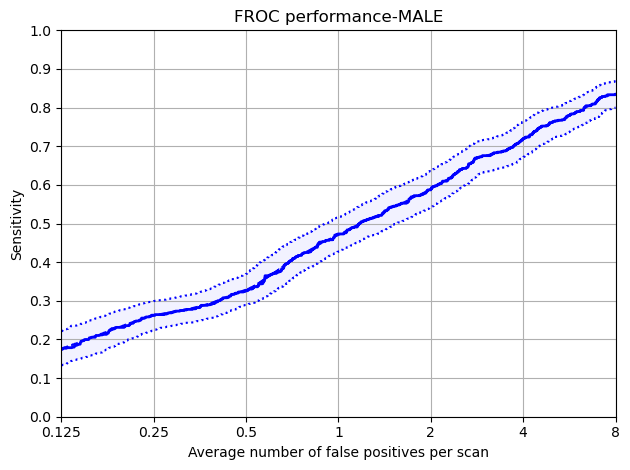

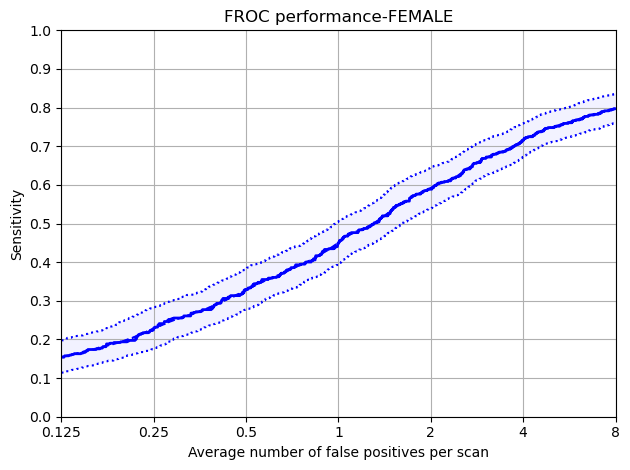

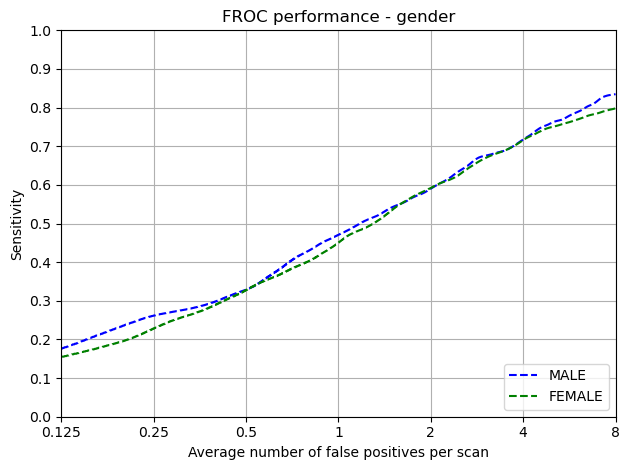

In [15]:
def set_is_actionable(row):
    if row['radiology_report_management_plan_final'] in ['3_MONTH_FOLLOW_UP_SCAN','URGENT_REFERRAL', 'ALWAYS_SCAN_AT_YEAR_1']:
        return 'Actonable'
    else:
        return 'Non-Actionable'

scan_metadata = (
    pd.read_csv(f'{workspace_path}/metadata/summit/white_only/test_scans_metadata.csv')
    .assign(name=lambda df: df['LDCT_RADIOLOGY_REPORT_main_participant_id'] + '_Y0_BASELINE_A')
    .assign(is_actionable=lambda df: df.apply(set_is_actionable, axis=1))
    .assign(gender_by_actionable=lambda df: df.apply(set_gender_by_actionable, axis=1))    
    .assign(ethnic_group_by_actionable=lambda df: df.apply(set_ethnic_group_by_actionable, axis=1))    
    .rename(columns={
        'participant_details_gender':'gender',
        'lung_health_check_demographics_race_ethnicgroup':'ethnic_group'
    })
)

annotations_excluded = pd.read_csv(f'{workspace_path}/data/summit/metadata/grt123_annotations_excluded_empty.csv')

annotations = pd.read_csv(f'{workspace_path}/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_metadata.csv')

predictions = pd.read_csv(f'{workspace_path}/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_predictions.csv')

protected_group = 'gender'
data_dict = protected_group_analysis(
    protected_group, 
    scan_metadata, 
    annotations, 
    annotations_excluded, 
    predictions, 
    f'{workspace_path}/results/grt123/trained_summit/summit/white_only/{protected_group}'
)

### Ethnicity analysis

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmp4mg2x9bo/annotations.csv
Total number of included nodule annotations: 1218
Total number of nodule annotations: 1218
Cases: 899


100%|██████████| 1000/1000 [00:29<00:00, 33.73it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.17      0.14       0.20
159   0.25       0.24      0.21       0.27
476   0.50       0.33      0.29       0.37
1111  1.00       0.46      0.43       0.49
2381  2.00       0.59      0.56       0.63
4920  4.00       0.72      0.69       0.75
9999  8.00       0.81      0.79       0.84

Mean Sensitivity: 0.47 Low Sensitivity: 0.44 High Sensitivity: 0.51


True positives       1055
0                                    False positives  18075.000
1                                    False negatives    163.000
2                                     True negatives      0.000
3                         Total number of candidates  19159.000
4                            Total number of nodules   1218.000
5             Ignored candidates on excluded nodules      0.000
6      Ignored candidates which were double detec...     29.000
7                                        Sensitivity      0.866
8              Average number of candidates per scan     21.311

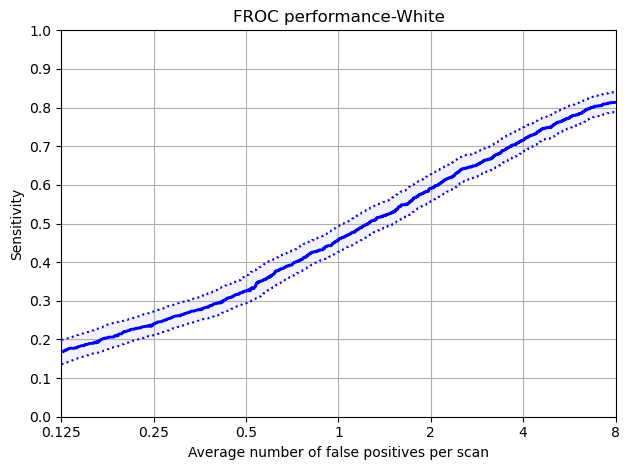

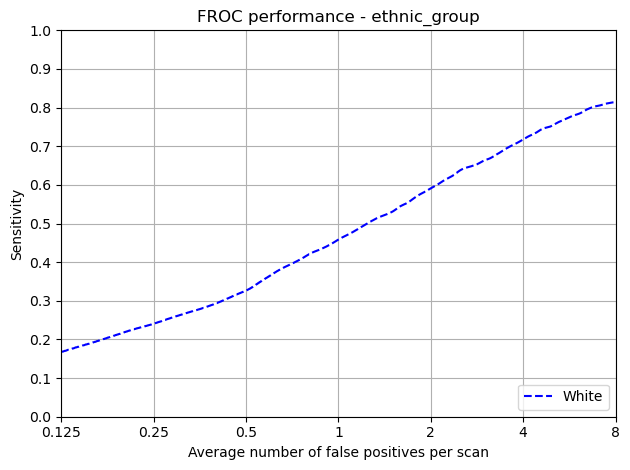

In [16]:
protected_group = 'ethnic_group'
data_dict = protected_group_analysis(
    protected_group, 
    scan_metadata, 
    annotations, 
    annotations_excluded, 
    predictions, 
    f'{workspace_path}/results/grt123/trained_summit/summit/white_only/{protected_group}'
)

### Is Actionable

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmpz71qd_c1/annotations.csv
Total number of included nodule annotations: 443
Total number of nodule annotations: 443
Cases: 603


100%|██████████| 1000/1000 [00:17<00:00, 56.83it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.15      0.10       0.20
159   0.25       0.23      0.19       0.28
476   0.50       0.34      0.29       0.40
1111  1.00       0.51      0.46       0.56
2381  2.00       0.66      0.62       0.71
4920  4.00       0.79      0.75       0.83
9999  8.00       0.88      0.84       0.91

Mean Sensitivity: 0.51 Low Sensitivity: 0.46 High Sensitivity: 0.56


True positives        401
0                                    False positives  11723.000
1                                    False negatives     42.000
2                                     True negatives      0.000
3                         Total number of candidates  12124.000
4                            Total number of nodules    443.000
5             Ignored candidates on excluded nodules      0.000
6      Ignored candidates which were double detec...      0.000
7                                        Sensitivity      0.905
8              Average number of candidates per scan     20.106

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmpuke2lxct/annotations.csv
Total number of included nodule annotations: 775
Total number of nodule annotations: 775
Cases: 297


100%|██████████| 1000/1000 [00:08<00:00, 117.50it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.15      0.10       0.21
159   0.25       0.23      0.19       0.27
476   0.50       0.31      0.27       0.36
1111  1.00       0.42      0.37       0.47
2381  2.00       0.53      0.49       0.58
4920  4.00       0.66      0.62       0.71
9999  8.00       0.77      0.74       0.81

Mean Sensitivity: 0.44 Low Sensitivity: 0.4 High Sensitivity: 0.49


True positives       654
0                                    False positives  6352.000
1                                    False negatives   121.000
2                                     True negatives     0.000
3                         Total number of candidates  7035.000
4                            Total number of nodules   775.000
5             Ignored candidates on excluded nodules     0.000
6      Ignored candidates which were double detec...    29.000
7                                        Sensitivity     0.844
8              Average number of candidates per scan    23.687

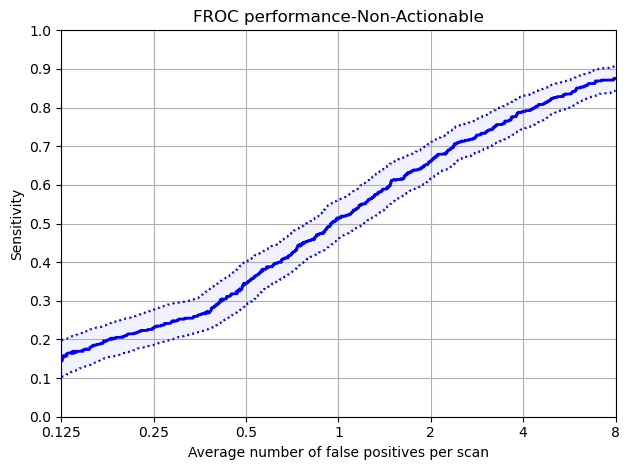

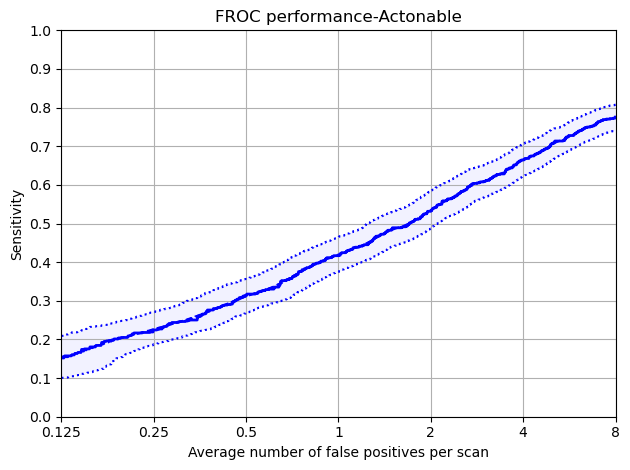

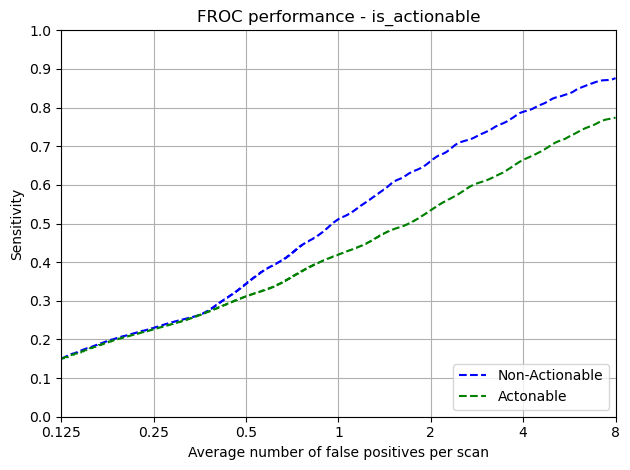

In [17]:
protected_group = 'is_actionable'
data_dict = protected_group_analysis(
    protected_group, 
    scan_metadata, 
    annotations, 
    annotations_excluded, 
    predictions, 
    f'{workspace_path}/results/grt123/trained_summit/summit/white_only/{protected_group}'
)

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmptxpft2d4/annotations.csv
Total number of included nodule annotations: 277
Total number of nodule annotations: 277
Cases: 348


100%|██████████| 1000/1000 [00:08<00:00, 111.89it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.16      0.09       0.23
159   0.25       0.24      0.19       0.30
476   0.50       0.35      0.27       0.43
1111  1.00       0.53      0.46       0.60
2381  2.00       0.65      0.59       0.71
4920  4.00       0.79      0.72       0.85
9999  8.00       0.89      0.84       0.93

Mean Sensitivity: 0.52 Low Sensitivity: 0.45 High Sensitivity: 0.58


True positives       253
0                                    False positives  7501.000
1                                    False negatives    24.000
2                                     True negatives     0.000
3                         Total number of candidates  7754.000
4                            Total number of nodules   277.000
5             Ignored candidates on excluded nodules     0.000
6      Ignored candidates which were double detec...     0.000
7                                        Sensitivity     0.913
8              Average number of candidates per scan    22.282

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmps_6phaup/annotations.csv
Total number of included nodule annotations: 166
Total number of nodule annotations: 166
Cases: 256


100%|██████████| 1000/1000 [00:05<00:00, 190.44it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.14      0.08       0.22
159   0.25       0.21      0.14       0.29
476   0.50       0.32      0.24       0.40
1111  1.00       0.50      0.41       0.59
2381  2.00       0.67      0.60       0.74
4920  4.00       0.79      0.72       0.85
9999  8.00       0.86      0.80       0.91

Mean Sensitivity: 0.5 Low Sensitivity: 0.43 High Sensitivity: 0.57


True positives       148
0                                    False positives  4222.000
1                                    False negatives    18.000
2                                     True negatives     0.000
3                         Total number of candidates  4370.000
4                            Total number of nodules   166.000
5             Ignored candidates on excluded nodules     0.000
6      Ignored candidates which were double detec...     0.000
7                                        Sensitivity     0.892
8              Average number of candidates per scan    17.070

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmpwomzwx3p/annotations.csv
Total number of included nodule annotations: 389
Total number of nodule annotations: 389
Cases: 153


100%|██████████| 1000/1000 [00:04<00:00, 226.85it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.16      0.11       0.23
159   0.25       0.25      0.19       0.31
476   0.50       0.31      0.26       0.37
1111  1.00       0.42      0.36       0.48
2381  2.00       0.53      0.47       0.59
4920  4.00       0.66      0.60       0.72
9999  8.00       0.79      0.74       0.84

Mean Sensitivity: 0.45 Low Sensitivity: 0.39 High Sensitivity: 0.51


True positives       335
0                                    False positives  3591.000
1                                    False negatives    54.000
2                                     True negatives     0.000
3                         Total number of candidates  3943.000
4                            Total number of nodules   389.000
5             Ignored candidates on excluded nodules     0.000
6      Ignored candidates which were double detec...    17.000
7                                        Sensitivity     0.861
8              Average number of candidates per scan    25.771

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmpq5l02ke0/annotations.csv
Total number of included nodule annotations: 386
Total number of nodule annotations: 386
Cases: 145


100%|██████████| 1000/1000 [00:03<00:00, 275.34it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.14      0.03       0.21
159   0.25       0.21      0.14       0.30
476   0.50       0.32      0.24       0.40
1111  1.00       0.43      0.36       0.50
2381  2.00       0.54      0.48       0.61
4920  4.00       0.67      0.61       0.73
9999  8.00       0.76      0.71       0.81

Mean Sensitivity: 0.44 Low Sensitivity: 0.37 High Sensitivity: 0.51


True positives       319
0                                    False positives  2761.000
1                                    False negatives    67.000
2                                     True negatives     0.000
3                         Total number of candidates  3092.000
4                            Total number of nodules   386.000
5             Ignored candidates on excluded nodules     0.000
6      Ignored candidates which were double detec...    12.000
7                                        Sensitivity     0.826
8              Average number of candidates per scan    21.324

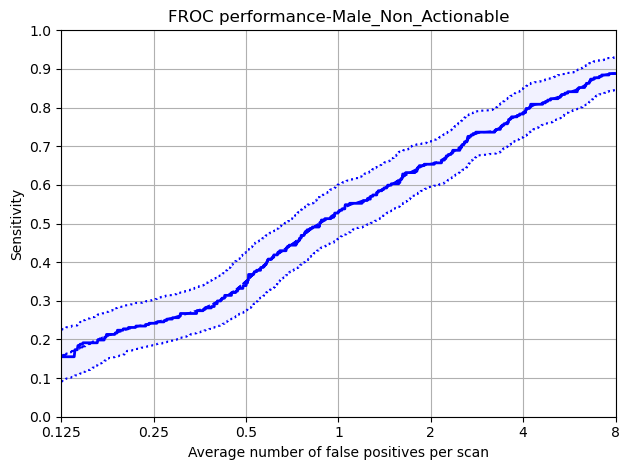

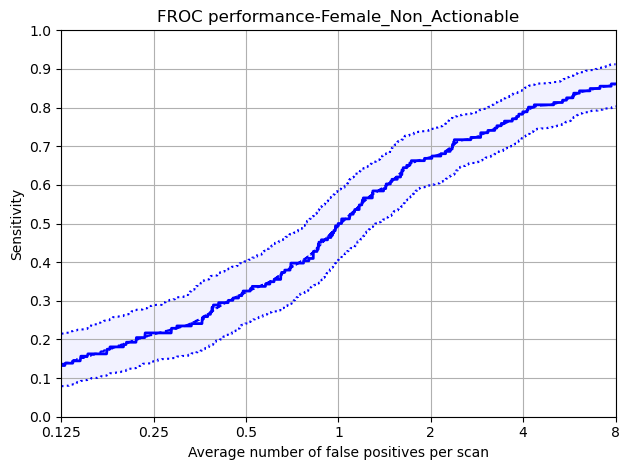

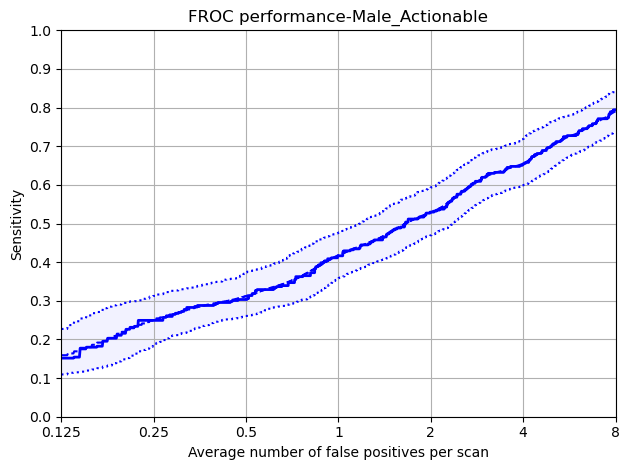

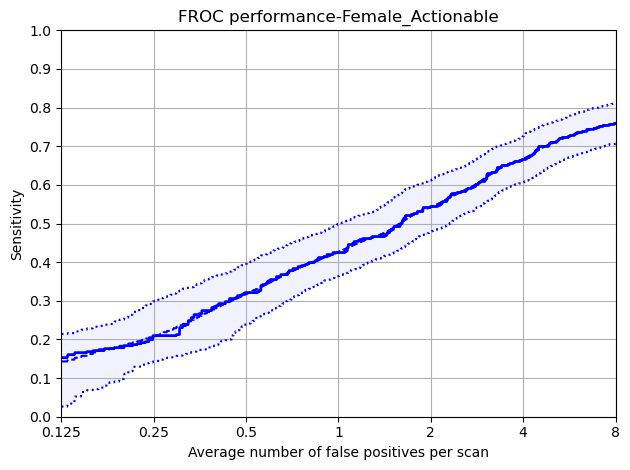

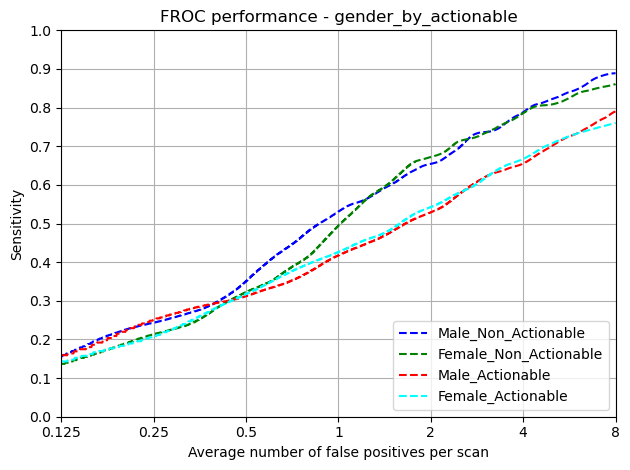

In [18]:
protected_group = 'gender_by_actionable'
data_dict = protected_group_analysis(
    protected_group, 
    scan_metadata, 
    annotations, 
    annotations_excluded, 
    predictions, 
    f'{workspace_path}/results/grt123/trained_summit/summit/white_only/{protected_group}'
)

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmppcqflu92/annotations.csv
Total number of included nodule annotations: 443
Total number of nodule annotations: 443
Cases: 603


100%|██████████| 1000/1000 [00:18<00:00, 55.19it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.15      0.10       0.20
159   0.25       0.23      0.19       0.28
476   0.50       0.34      0.29       0.40
1111  1.00       0.51      0.46       0.56
2381  2.00       0.66      0.61       0.71
4920  4.00       0.79      0.75       0.83
9999  8.00       0.88      0.84       0.91

Mean Sensitivity: 0.51 Low Sensitivity: 0.46 High Sensitivity: 0.56


True positives        401
0                                    False positives  11723.000
1                                    False negatives     42.000
2                                     True negatives      0.000
3                         Total number of candidates  12124.000
4                            Total number of nodules    443.000
5             Ignored candidates on excluded nodules      0.000
6      Ignored candidates which were double detec...      0.000
7                                        Sensitivity      0.905
8              Average number of candidates per scan     20.106

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmp2kj6za1m/annotations.csv
Total number of included nodule annotations: 775
Total number of nodule annotations: 775
Cases: 297


100%|██████████| 1000/1000 [00:08<00:00, 122.22it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.15      0.10       0.21
159   0.25       0.23      0.19       0.27
476   0.50       0.31      0.27       0.35
1111  1.00       0.42      0.38       0.46
2381  2.00       0.53      0.49       0.58
4920  4.00       0.66      0.62       0.71
9999  8.00       0.77      0.74       0.81

Mean Sensitivity: 0.44 Low Sensitivity: 0.4 High Sensitivity: 0.48


True positives       654
0                                    False positives  6352.000
1                                    False negatives   121.000
2                                     True negatives     0.000
3                         Total number of candidates  7035.000
4                            Total number of nodules   775.000
5             Ignored candidates on excluded nodules     0.000
6      Ignored candidates which were double detec...    29.000
7                                        Sensitivity     0.844
8              Average number of candidates per scan    23.687

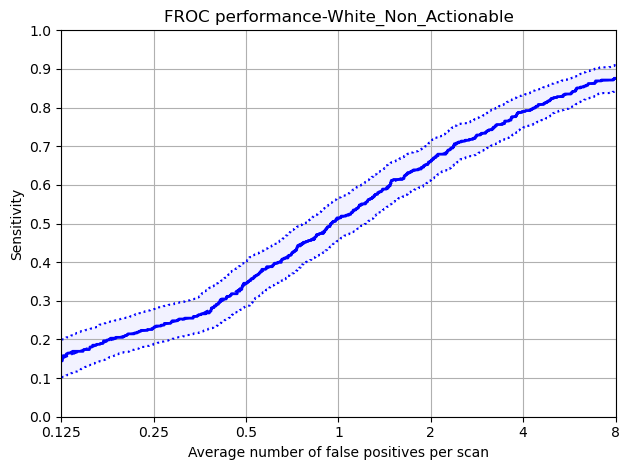

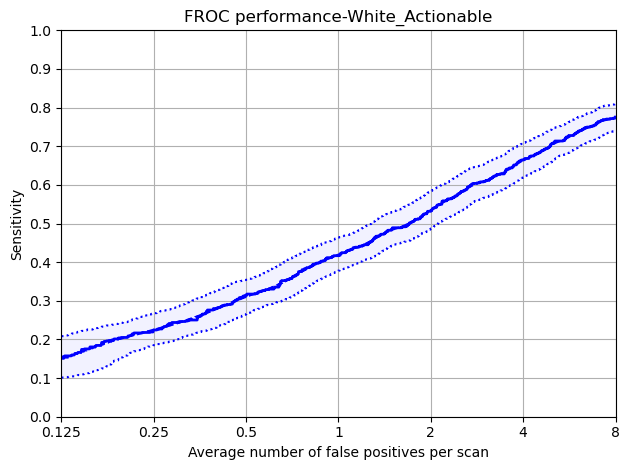

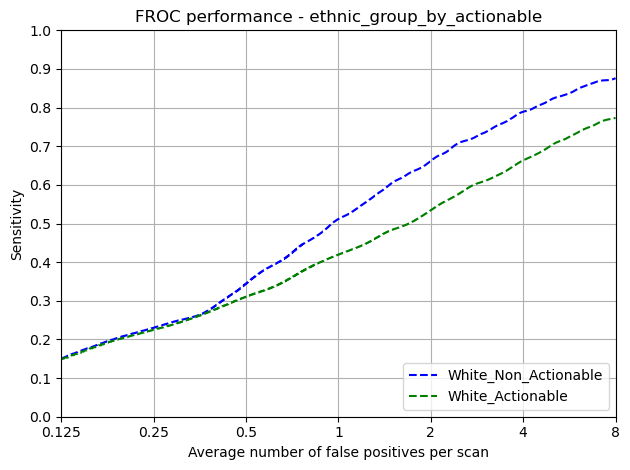

In [19]:
protected_group = 'ethnic_group_by_actionable'
data_dict = protected_group_analysis(
    protected_group, 
    scan_metadata, 
    annotations, 
    annotations_excluded, 
    predictions, 
    f'{workspace_path}/results/grt123/trained_summit/summit/white_only/{protected_group}'
)

### False positive and Miss Investigations

In [20]:
thresholds = get_thresholds(grt123_summit_summit)
missed_metadata = miss_anaysis_at_fpps(
    scans_path=f'{workspace_path}/metadata/summit/partial/test_scans.csv',
    annotations_path=f'{workspace_path}/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_metadata.csv',
    exclusions_path=f'{workspace_path}/data/summit/metadata/grt123_annotations_excluded_empty.csv',
    predictions_path=f'{workspace_path}/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_predictions.csv',
    thresholds=thresholds
)


/Users/john/Projects/SOTAEvaluationNoduleDetection/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_metadata.csv
Total number of included nodule annotations: 199
Total number of nodule annotations: 199
Cases: 892
Missed Annotations at 7.228441 FPPs: 161
/Users/john/Projects/SOTAEvaluationNoduleDetection/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_metadata.csv
Total number of included nodule annotations: 199
Total number of nodule annotations: 199
Cases: 892
Missed Annotations at 6.7572556 FPPs: 147
/Users/john/Projects/SOTAEvaluationNoduleDetection/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_metadata.csv
Total number of included nodule annotations: 199
Total number of nodule annotations: 199
Cases: 892
Missed Annotations at 6.2456627 FPPs: 121
/Users/john/Projects/SOTAEvaluationNoduleDetection/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_metadata.csv
Total number of included nodule annotat

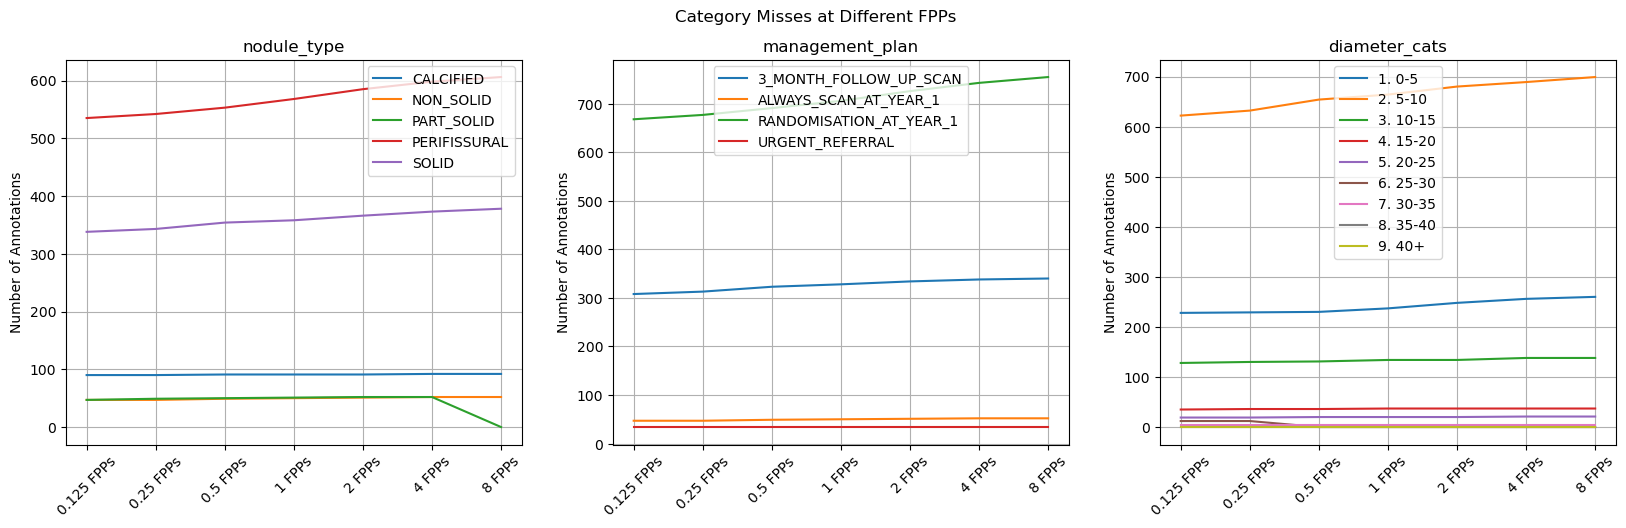

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for ivx, var in enumerate(['nodule_type','management_plan','diameter_cats']):
    annotations = pd.read_csv(f'{workspace_path}/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_metadata.csv')
    total_vc = annotations[var].value_counts().sort_index().rename('Total Annotations')

    operating_points = ['0.125', '0.25', '0.5', '1', '2', '4', '8']

    results = []
    for idx, metadata in enumerate(missed_metadata):
        vc = metadata[var].value_counts().sort_index()

        results.append((total_vc - vc).rename(f'{operating_points[idx]} FPPs'))

    df = pd.concat(results, axis=1).fillna(0).round(2)

    for column in df.T:
        ax[ivx].plot(df.T[column], label=column)
    
    ax[ivx].set_xticklabels(labels=df.columns, rotation=45)
    ax[ivx].set_title(var)
    ax[ivx].legend()
    ax[ivx].set_ylabel('Number of Annotations')
    ax[ivx].grid(visible=True, which='both')

plt.suptitle('Category Misses at Different FPPs')
plt.show()

In [22]:
thresholds = get_thresholds(grt123_summit_summit)

scans = pd.read_csv(f'{workspace_path}/metadata/summit/white_only/test_scans.csv')
predictions = pd.read_csv(f'{workspace_path}/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_predictions.csv')
annotations = pd.read_csv(f'{workspace_path}/models/grt123/bbox_result/trained_summit/summit/white_only/white_only_metadata.csv')

false_positives_fpps = false_positive_analysis(
    thresholds=thresholds,    
    predictions=predictions,
    annotations=annotations
)

predictions: 314 at threshold: 7.228441
distance false positives: 111 at threshold: 7.228441
predictions: 516 at threshold: 6.7572556
distance false positives: 224 at threshold: 6.7572556
predictions: 845 at threshold: 6.2456627
distance false positives: 449 at threshold: 6.2456627
predictions: 1459 at threshold: 5.6314945
distance false positives: 899 at threshold: 5.6314945
predictions: 2519 at threshold: 4.7385654
distance false positives: 1798 at threshold: 4.7385654
predictions: 4473 at threshold: 3.4896648
distance false positives: 3598 at threshold: 3.4896648
predictions: 8078 at threshold: 1.7281716
distance false positives: 7077 at threshold: 1.7281716


None
[[161.64        54.0500061   66.4799939    5.28515429]
 [ 98.28       135.4900061   32.0499939    8.12109075]
 [ 78.42        35.4000061  234.0699939    8.12109075]
 [105.97       156.0700061  221.0799939    3.09374886]]
summit-8824-ktj_Y0_BASELINE_A - 81.32979 133.36847 197.6423 25.65062
False Positive: True
IoU False Positive: 0.0015110671586869092


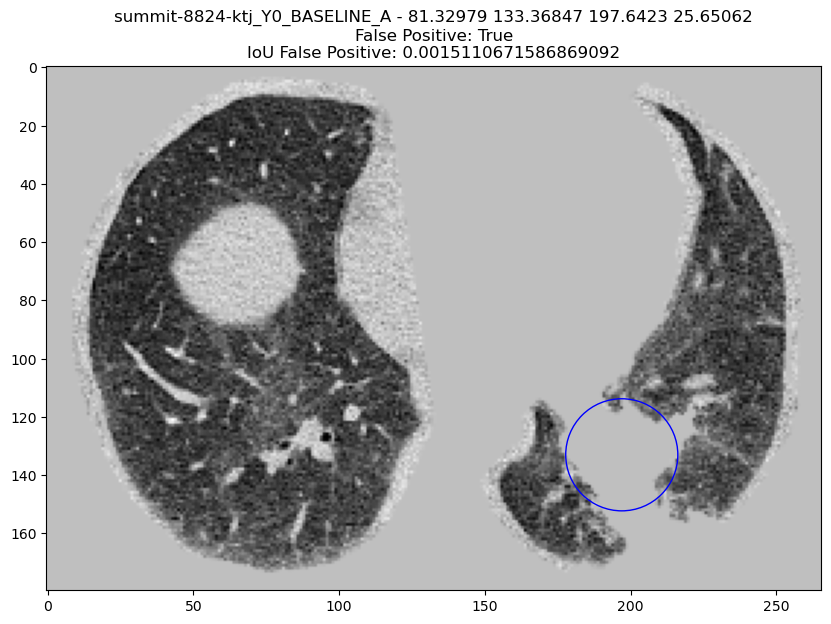

None
[[0 0 0 0]]
summit-8795-gkd_Y0_BASELINE_A - 161.42075 53.305885 125.44918 24.608696
False Positive: True
IoU False Positive: nan


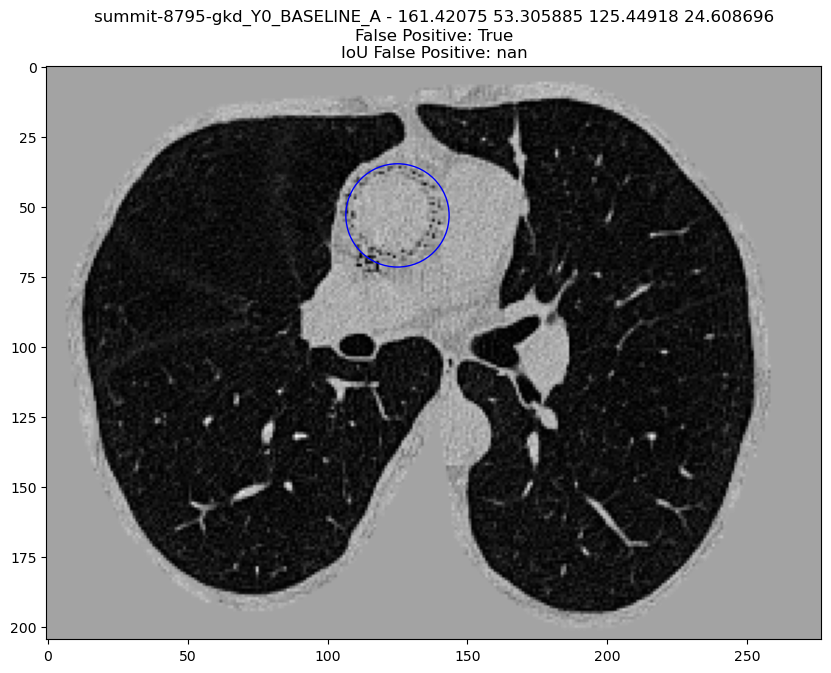

None
[[ 85.865      189.16000305  45.86000305   6.0839865 ]
 [209.515      193.44000305 208.71000305   4.30664213]
 [ 55.435      117.11000305 294.88000305   7.04101808]
 [172.485      197.65000305  90.80000305   9.09180005]
 [119.045       30.35000305  79.01000305   3.96484513]
 [ 78.035      121.58000305 294.46000305   3.75976694]]
summit-9652-dzk_Y0_BASELINE_A - 157.42068 165.43137 197.71623 26.093346
False Positive: True
IoU False Positive: 0.0


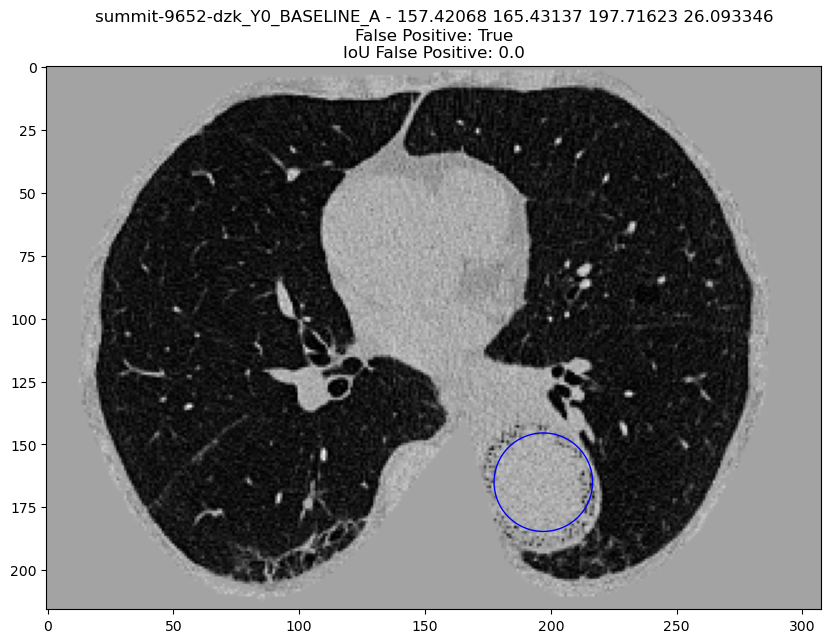

summit-9652-dzk_Y0_BASELINE_A already exists
[[ 85.865      189.16000305  45.86000305   6.0839865 ]
 [209.515      193.44000305 208.71000305   4.30664213]
 [ 55.435      117.11000305 294.88000305   7.04101808]
 [172.485      197.65000305  90.80000305   9.09180005]
 [119.045       30.35000305  79.01000305   3.96484513]
 [ 78.035      121.58000305 294.46000305   3.75976694]]
summit-9652-dzk_Y0_BASELINE_A - 197.44072 137.4564 177.66301 25.552605
False Positive: True
IoU False Positive: 0.0


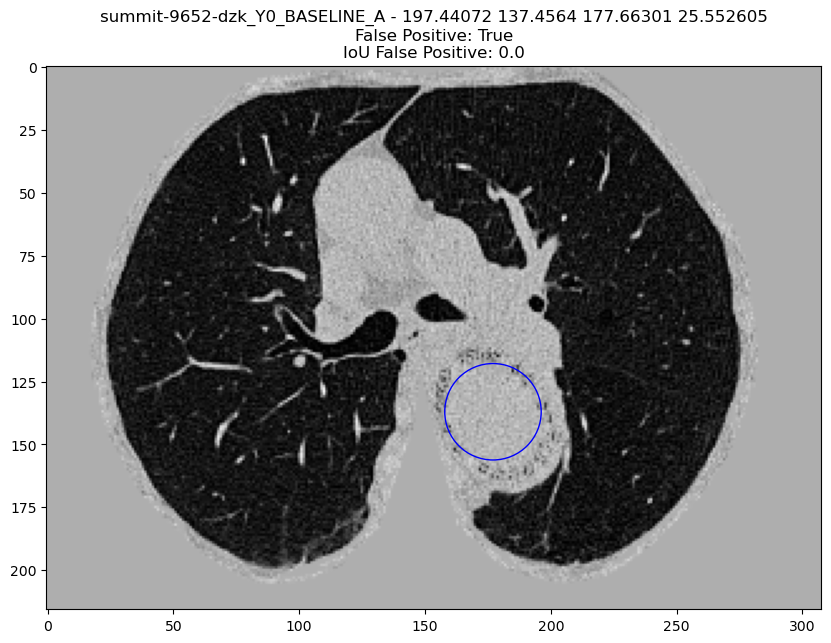

summit-9652-dzk_Y0_BASELINE_A already exists
[[ 85.865      189.16000305  45.86000305   6.0839865 ]
 [209.515      193.44000305 208.71000305   4.30664213]
 [ 55.435      117.11000305 294.88000305   7.04101808]
 [172.485      197.65000305  90.80000305   9.09180005]
 [119.045       30.35000305  79.01000305   3.96484513]
 [ 78.035      121.58000305 294.46000305   3.75976694]]
summit-9652-dzk_Y0_BASELINE_A - 229.47484 117.38738 161.61928 25.377777
False Positive: True
IoU False Positive: 0.0


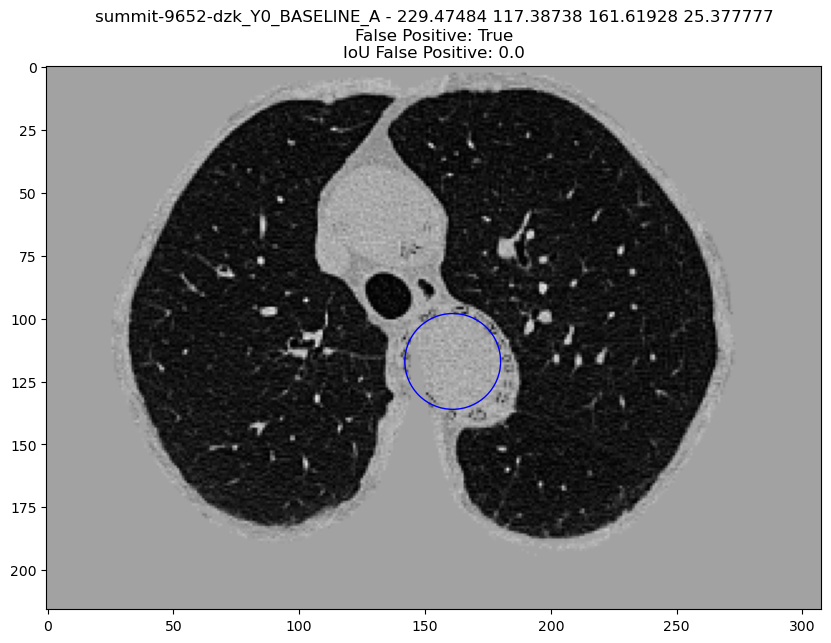

summit-9652-dzk_Y0_BASELINE_A already exists
[[ 85.865      189.16000305  45.86000305   6.0839865 ]
 [209.515      193.44000305 208.71000305   4.30664213]
 [ 55.435      117.11000305 294.88000305   7.04101808]
 [172.485      197.65000305  90.80000305   9.09180005]
 [119.045       30.35000305  79.01000305   3.96484513]
 [ 78.035      121.58000305 294.46000305   3.75976694]]
summit-9652-dzk_Y0_BASELINE_A - 117.44938 165.52028 201.70337 25.764578
False Positive: True
IoU False Positive: 0.0


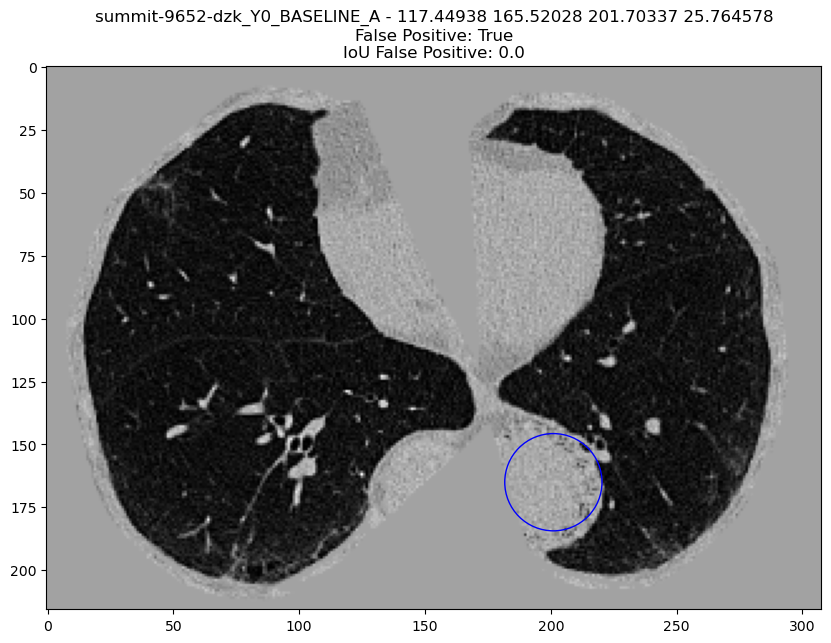

summit-9652-dzk_Y0_BASELINE_A already exists
[[ 85.865      189.16000305  45.86000305   6.0839865 ]
 [209.515      193.44000305 208.71000305   4.30664213]
 [ 55.435      117.11000305 294.88000305   7.04101808]
 [172.485      197.65000305  90.80000305   9.09180005]
 [119.045       30.35000305  79.01000305   3.96484513]
 [ 78.035      121.58000305 294.46000305   3.75976694]]
summit-9652-dzk_Y0_BASELINE_A - 177.44371 153.50923 189.72955 25.979664
False Positive: True
IoU False Positive: 0.0


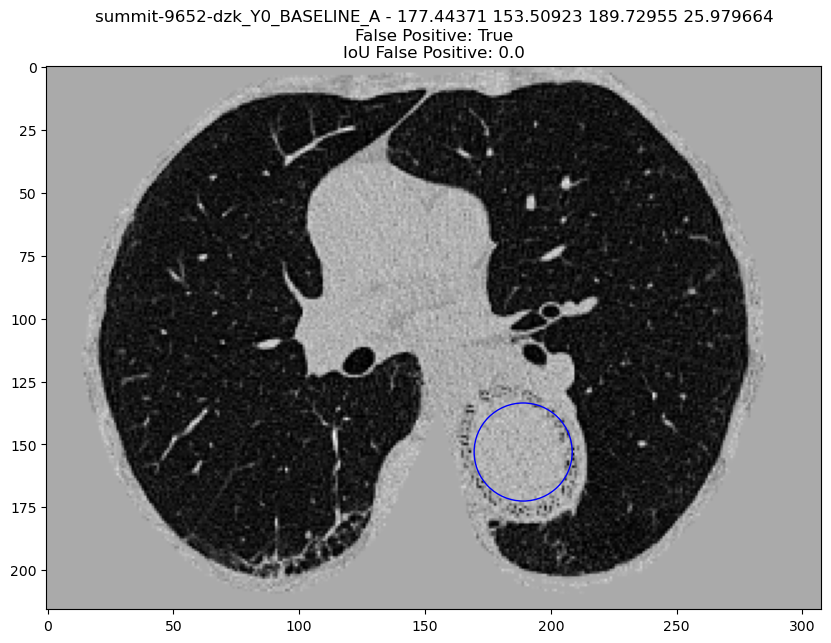

None
[[166.925      170.11        61.1700061    7.12968493]]
summit-9677-vce_Y0_BASELINE_A - 61.46758 201.43488 61.54931 25.0159
False Positive: True
IoU False Positive: 0.0


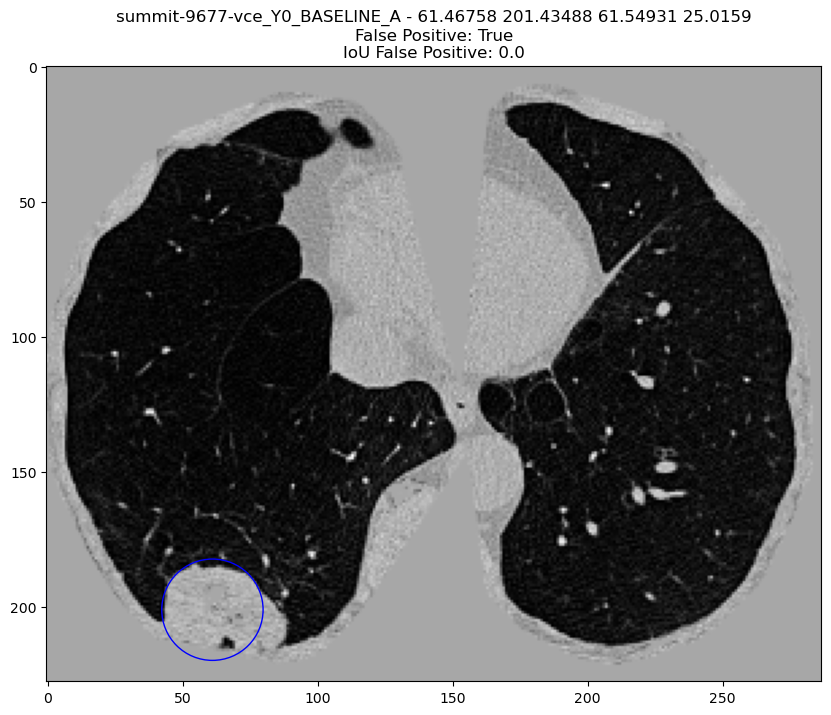

None
[[269.725      151.44       128.0399939    8.32500458]
 [123.215      139.94        48.9399939    4.35761958]
 [110.845      100.59        49.6599939    4.16250229]
 [107.395      161.2        257.8699939    8.84531736]
 [ 93.495      193.46        57.6699939    5.59336245]
 [181.835       40.02        99.1599939   17.49551743]]
summit-8656-vbc_Y0_BASELINE_A - 153.65442 41.365387 89.42342 24.351574
False Positive: True
IoU False Positive: 0.0


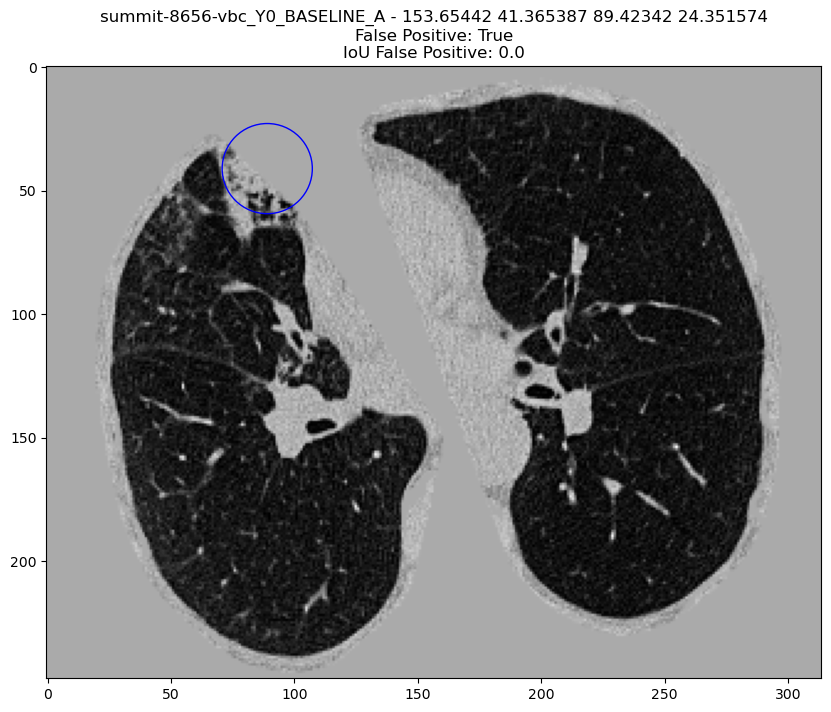

None
[[0 0 0 0]]
summit-8777-dhu_Y0_BASELINE_A - 61.488102 117.491486 81.62345 25.06675
False Positive: True
IoU False Positive: nan


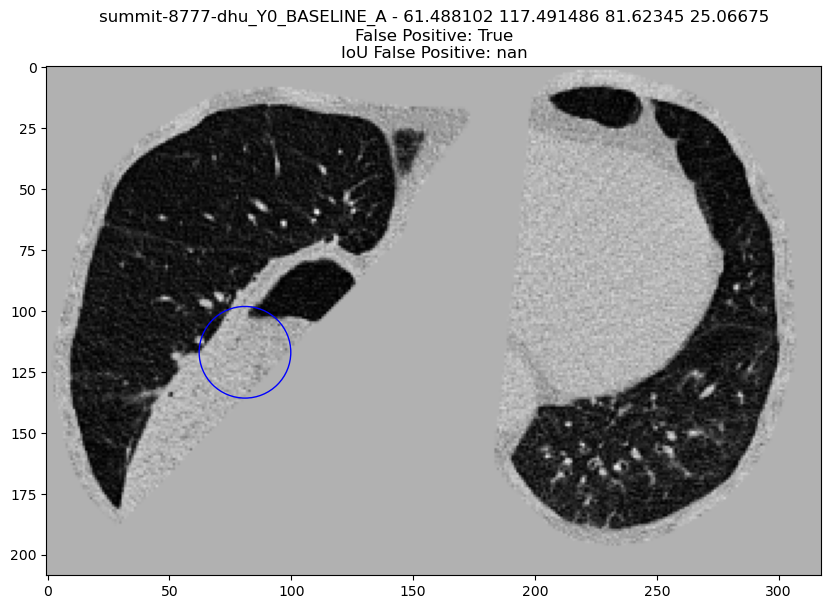

None
[[155.665       63.46       209.3099939    3.96484513]
 [181.015       93.42        49.9399939    5.12695491]
 [187.235      151.25        39.9099939    4.71679852]
 [191.335      150.01       222.6299939    8.95508125]
 [150.635      207.65        89.2699939    4.03320453]
 [151.075      189.55        41.6299939    8.06640906]
 [ 95.035      155.55       234.7499939    8.75000305]
 [239.835      159.1        206.3099939    4.92187672]
 [227.035      168.8        187.6399939    4.30664213]
 [215.825      149.55        54.5099939    6.1523459 ]
 [201.605      173.88        72.7599939   12.50976999]
 [202.555       93.67        77.8699939    3.75976694]
 [117.145      187.31        50.5399939    4.30664213]]
summit-8843-tgv_Y0_BASELINE_A - 89.677826 157.32695 233.39632 21.81539
False Positive: True
IoU False Positive: 0.0


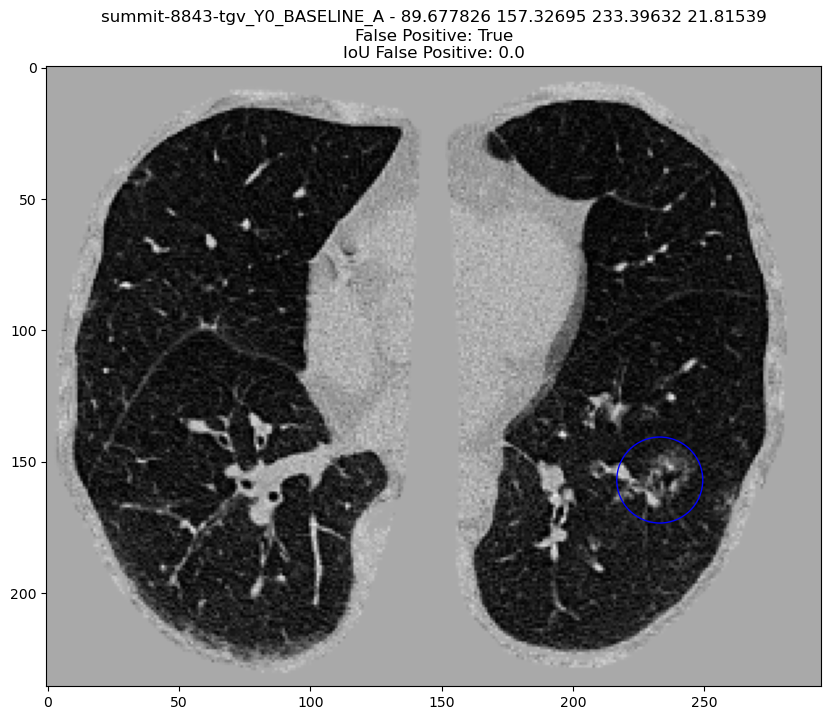

None
[[124.38       172.2         61.2699939    3.8373068 ]
 [131.7        163.64        42.1199939    3.25195491]
 [ 87.74        33.08        46.9999939    4.74785417]
 [100.          74.92       265.0599939    3.51211131]]
summit-9829-vrp_Y0_BASELINE_A - 41.65703 145.36221 77.42609 22.887589
False Positive: True
IoU False Positive: 0.0


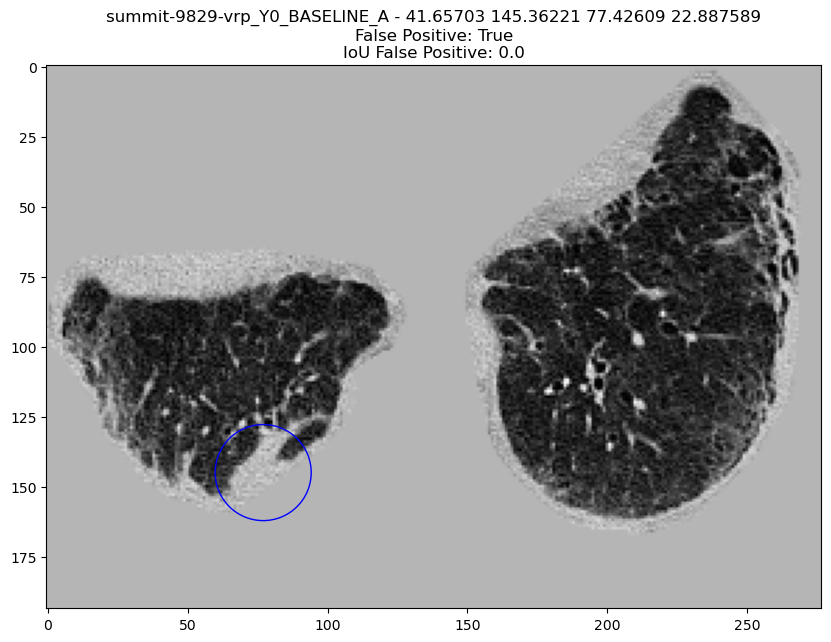

In [24]:
cnt = 0

df = false_positives_fpps['0.125']

for idx, row in df[df.distance_false_positive].sort_values(by='threshold', ascending=False).iterrows():
    study_id = row['name']
    x = row['row']
    y = row['col']
    z = row['index']
    diameter = row['diameter']
    

    copy_numpy_from_cluster(study_id)
    show_numpy_candidate_location(study_id, x, y, z, diameter, row.distance_false_positive, row.iou_false_positive)
    cnt+=1
    if cnt == 12:
        break

## MONAI Detection

/Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/result/trained_summit/summit/white_only/result_white_only.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/result/trained_summit/summit/white_only/annotations.csv
Total number of included nodule annotations: 1218
Total number of nodule annotations: 1218
Cases: 899
This is strange: CAD mark None detected two nodules! Check for overlapping nodule annotations, SeriesUID: summit-8739-emz_Y0_BASELINE_A, nodule Annot ID: None


100%|██████████| 1000/1000 [00:49<00:00, 20.17it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.21      0.18       0.24
159   0.25       0.30      0.27       0.34
476   0.50       0.43      0.39       0.47
1111  1.00       0.59      0.55       0.63
2381  2.00       0.72      0.69       0.76
4920  4.00       0.83      0.81       0.86
9999  8.00       0.90      0.88       0.92

Mean Sensitivity: 0.57 Low Sensitivity: 0.54 High Sensitivity: 0.6


True positives       1177
0                                    False positives  31654.000
1                                    False negatives     41.000
2                                     True negatives      0.000
3                         Total number of candidates  33756.000
4                            Total number of nodules   1218.000
5             Ignored candidates on excluded nodules      0.000
6      Ignored candidates which were double detec...    926.000
7                                        Sensitivity      0.966
8              Average number of candidates per scan     37.548

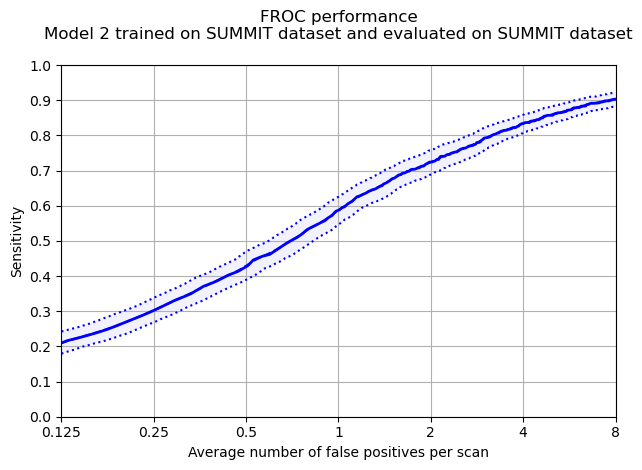

In [25]:

detection_predictions_path = combine_predictions(f'{workspace_path}/models/detection/result/trained_summit/summit/white_only', 'test')
detection_predictions = pd.read_csv(detection_predictions_path)

annotations = (
    pd.read_csv(f'{workspace_path}/metadata/summit/white_only/test_metadata.csv')
    .assign(name=lambda df: df.participant_id + '_Y0_BASELINE_A')
    .assign(row=lambda df: df['nodule_x_coordinate'])
    .assign(col=lambda df: df['nodule_y_coordinate'])
    .assign(index=lambda df: df['nodule_z_coordinate'])
    .assign(diameter=lambda df: df['nodule_diameter_mm'])
    .assign(diameter_cats=lambda df: pd.cut(
        df['nodule_diameter_mm'],
        bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 999],
        labels=['1. 0-5', '2. 5-10', '3. 10-15', '4. 15-20', '5. 20-25', '6. 25-30', '7. 30-35', '8. 35-40', '9. 40+']
    ))
)

annotations.to_csv(f'{workspace_path}/models/detection/result/trained_summit/summit/white_only/annotations.csv', index=False)

detection_summit_summit = noduleCADEvaluation(
    annotations_filename=f'{workspace_path}/models/detection/result/trained_summit/summit/white_only/annotations.csv',
    annotations_excluded_filename=f'{workspace_path}/data/summit/metadata/annotations_excluded_empty.csv',
    seriesuids_filename=f'{workspace_path}/metadata/summit/white_only/test_scans.csv',
    results_filename=detection_predictions_path,
    filter='\nModel 2 trained on SUMMIT dataset and evaluated on SUMMIT dataset\n',
    outputDir=f'{workspace_path}/results/detection/trained_summit/summit/white_only',
)
caluclate_cpm_from_bootstrapping(f'{workspace_path}/results/detection/trained_summit/summit/white_only/froc_predictions_bootstrapping.csv')
show_metrics(f'{workspace_path}/results/detection/trained_summit/summit/white_only/CADAnalysis.txt')


### Gender analysis

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmpbqg_x0j1/annotations.csv
Total number of included nodule annotations: 666
Total number of nodule annotations: 666
Cases: 500


100%|██████████| 1000/1000 [00:21<00:00, 45.84it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.24      0.20       0.29
159   0.25       0.33      0.28       0.39
476   0.50       0.43      0.38       0.49
1111  1.00       0.58      0.53       0.63
2381  2.00       0.73      0.67       0.78
4920  4.00       0.84      0.80       0.88
9999  8.00       0.91      0.88       0.93

Mean Sensitivity: 0.58 Low Sensitivity: 0.53 High Sensitivity: 0.63


True positives        644
0                                    False positives  18856.000
1                                    False negatives     22.000
2                                     True negatives      0.000
3                         Total number of candidates  19981.000
4                            Total number of nodules    666.000
5             Ignored candidates on excluded nodules      0.000
6      Ignored candidates which were double detec...    481.000
7                                        Sensitivity      0.967
8              Average number of candidates per scan     39.962

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmpdyr29z46/annotations.csv
Total number of included nodule annotations: 552
Total number of nodule annotations: 552
Cases: 400
This is strange: CAD mark None detected two nodules! Check for overlapping nodule annotations, SeriesUID: summit-8739-emz_Y0_BASELINE_A, nodule Annot ID: None


100%|██████████| 1000/1000 [00:14<00:00, 70.55it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.17      0.12       0.21
159   0.25       0.27      0.22       0.33
476   0.50       0.42      0.37       0.48
1111  1.00       0.61      0.55       0.67
2381  2.00       0.72      0.67       0.77
4920  4.00       0.83      0.78       0.87
9999  8.00       0.90      0.87       0.93

Mean Sensitivity: 0.56 Low Sensitivity: 0.51 High Sensitivity: 0.61


True positives        533
0                                    False positives  12798.000
1                                    False negatives     19.000
2                                     True negatives      0.000
3                         Total number of candidates  13775.000
4                            Total number of nodules    552.000
5             Ignored candidates on excluded nodules      0.000
6      Ignored candidates which were double detec...    445.000
7                                        Sensitivity      0.966
8              Average number of candidates per scan     34.438

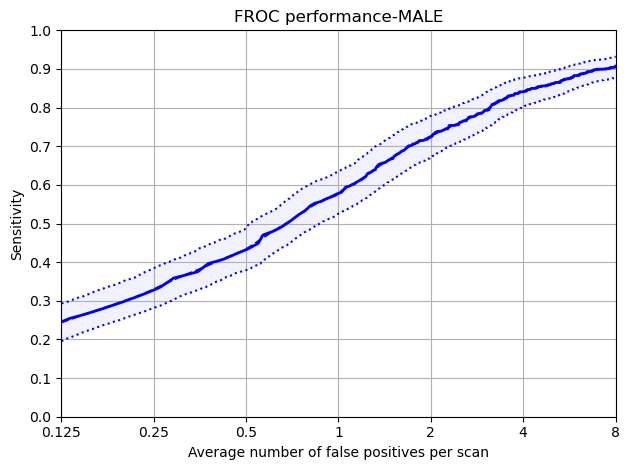

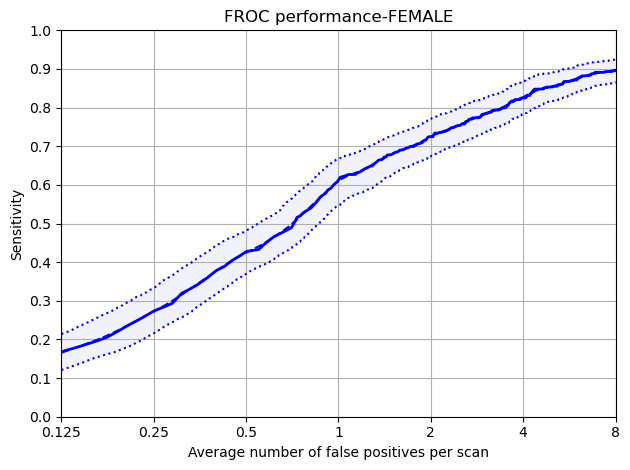

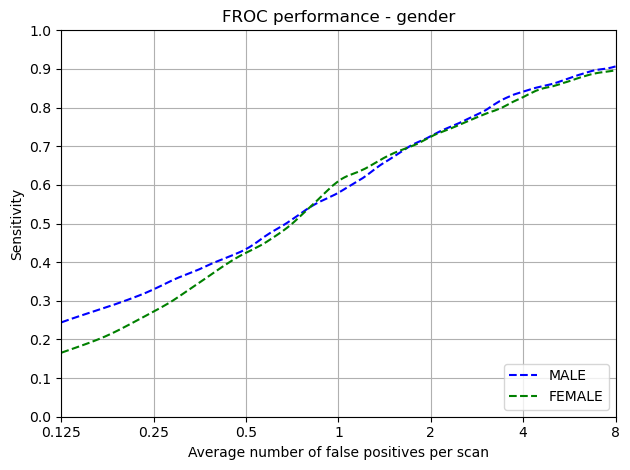

In [26]:


annotations = pd.read_csv(f'{workspace_path}/models/detection/result/trained_summit/summit/white_only/annotations.csv')

predictions = pd.read_csv(detection_predictions_path)

protected_group = 'gender'
data_dict = protected_group_analysis(
    protected_group, 
    scan_metadata, 
    annotations, 
    annotations_excluded, 
    predictions, 
    f'{workspace_path}/results/detection/trained_summit/summit/white_only/{protected_group}'
)

### Ethnicity Analysis

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmpkn909q_n/annotations.csv
Total number of included nodule annotations: 1218
Total number of nodule annotations: 1218
Cases: 899
This is strange: CAD mark None detected two nodules! Check for overlapping nodule annotations, SeriesUID: summit-8739-emz_Y0_BASELINE_A, nodule Annot ID: None


100%|██████████| 1000/1000 [00:44<00:00, 22.72it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.21      0.18       0.24
159   0.25       0.30      0.27       0.34
476   0.50       0.43      0.39       0.47
1111  1.00       0.59      0.55       0.63
2381  2.00       0.72      0.69       0.76
4920  4.00       0.83      0.81       0.86
9999  8.00       0.90      0.88       0.92

Mean Sensitivity: 0.57 Low Sensitivity: 0.54 High Sensitivity: 0.6


True positives       1177
0                                    False positives  31654.000
1                                    False negatives     41.000
2                                     True negatives      0.000
3                         Total number of candidates  33756.000
4                            Total number of nodules   1218.000
5             Ignored candidates on excluded nodules      0.000
6      Ignored candidates which were double detec...    926.000
7                                        Sensitivity      0.966
8              Average number of candidates per scan     37.548

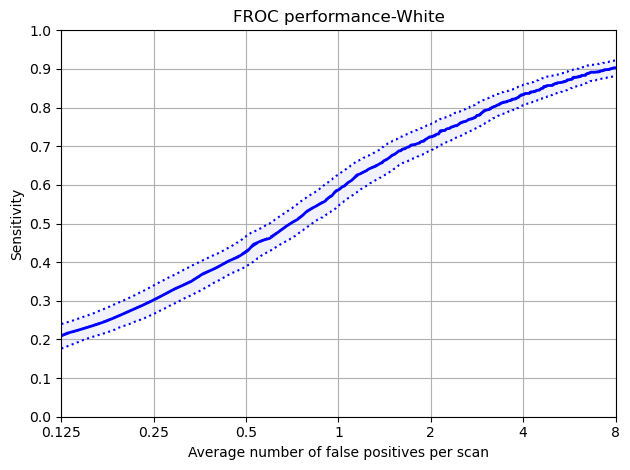

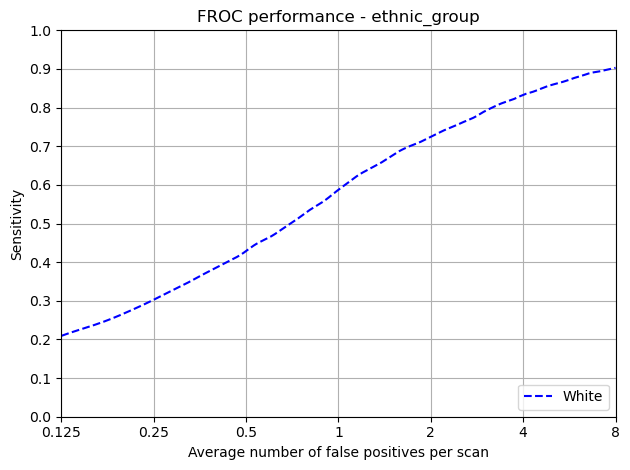

In [27]:
protected_group = 'ethnic_group'
data_dict = protected_group_analysis(
    protected_group, 
    scan_metadata, 
    annotations, 
    annotations_excluded, 
    predictions, 
    f'{workspace_path}/results/detection/trained_summit/summit/white_only/{protected_group}'
)

### Is Actionable

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmp0at1_a2_/annotations.csv
Total number of included nodule annotations: 443
Total number of nodule annotations: 443
Cases: 603


100%|██████████| 1000/1000 [00:22<00:00, 44.75it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.30      0.24       0.36
159   0.25       0.41      0.34       0.48
476   0.50       0.56      0.49       0.63
1111  1.00       0.74      0.68       0.79
2381  2.00       0.85      0.81       0.89
4920  4.00       0.93      0.90       0.95
9999  8.00       0.97      0.95       0.98

Mean Sensitivity: 0.68 Low Sensitivity: 0.63 High Sensitivity: 0.73


True positives        440
0                                    False positives  18445.000
1                                    False negatives      3.000
2                                     True negatives      0.000
3                         Total number of candidates  19040.000
4                            Total number of nodules    443.000
5             Ignored candidates on excluded nodules      0.000
6      Ignored candidates which were double detec...    155.000
7                                        Sensitivity      0.993
8              Average number of candidates per scan     31.575

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmpgzu4mmqy/annotations.csv
Total number of included nodule annotations: 775
Total number of nodule annotations: 775
Cases: 297
This is strange: CAD mark None detected two nodules! Check for overlapping nodule annotations, SeriesUID: summit-8739-emz_Y0_BASELINE_A, nodule Annot ID: None


100%|██████████| 1000/1000 [00:13<00:00, 72.03it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.17      0.13       0.21
159   0.25       0.25      0.21       0.29
476   0.50       0.35      0.30       0.40
1111  1.00       0.49      0.44       0.54
2381  2.00       0.63      0.58       0.68
4920  4.00       0.75      0.71       0.79
9999  8.00       0.85      0.82       0.88

Mean Sensitivity: 0.5 Low Sensitivity: 0.46 High Sensitivity: 0.54


True positives        737
0                                    False positives  13209.000
1                                    False negatives     38.000
2                                     True negatives      0.000
3                         Total number of candidates  14716.000
4                            Total number of nodules    775.000
5             Ignored candidates on excluded nodules      0.000
6      Ignored candidates which were double detec...    771.000
7                                        Sensitivity      0.951
8              Average number of candidates per scan     49.549

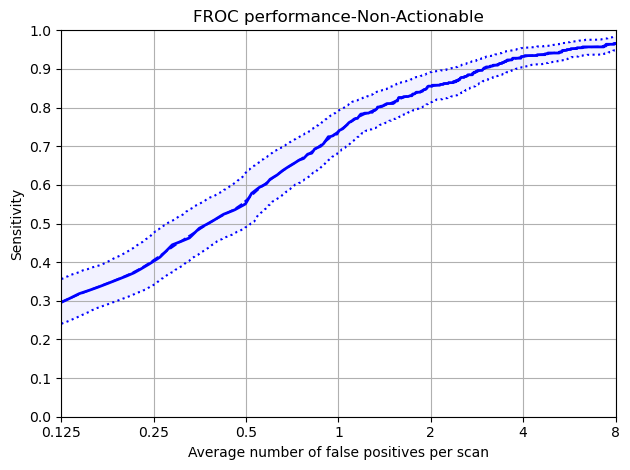

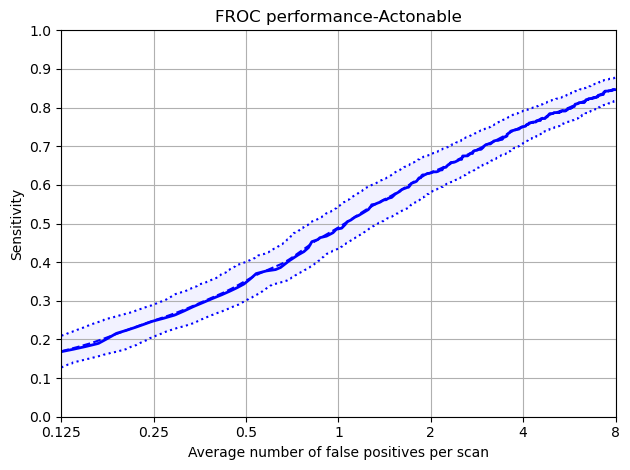

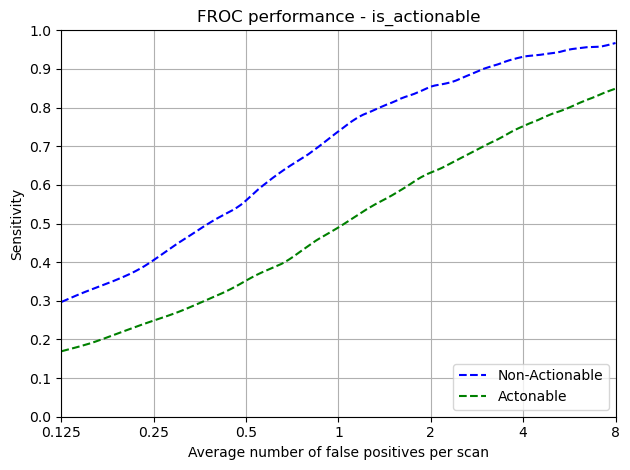

In [28]:
protected_group = 'is_actionable'
data_dict = protected_group_analysis(
    protected_group, 
    scan_metadata, 
    annotations, 
    annotations_excluded, 
    predictions, 
    f'{workspace_path}/results/detection/trained_summit/summit/white_only/{protected_group}'
)

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmp6y7thkgf/annotations.csv
Total number of included nodule annotations: 277
Total number of nodule annotations: 277
Cases: 348


100%|██████████| 1000/1000 [00:13<00:00, 74.37it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.34      0.26       0.42
159   0.25       0.45      0.37       0.53
476   0.50       0.58      0.50       0.67
1111  1.00       0.75      0.68       0.81
2381  2.00       0.87      0.81       0.91
4920  4.00       0.94      0.90       0.97
9999  8.00       0.97      0.94       0.99

Mean Sensitivity: 0.7 Low Sensitivity: 0.64 High Sensitivity: 0.76


True positives        275
0                                    False positives  11648.000
1                                    False negatives      2.000
2                                     True negatives      0.000
3                         Total number of candidates  12021.000
4                            Total number of nodules    277.000
5             Ignored candidates on excluded nodules      0.000
6      Ignored candidates which were double detec...     98.000
7                                        Sensitivity      0.993
8              Average number of candidates per scan     34.543

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmp2xs0upka/annotations.csv
Total number of included nodule annotations: 166
Total number of nodule annotations: 166
Cases: 256


100%|██████████| 1000/1000 [00:07<00:00, 129.91it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.23      0.15       0.32
159   0.25       0.35      0.25       0.46
476   0.50       0.53      0.43       0.62
1111  1.00       0.74      0.65       0.81
2381  2.00       0.84      0.78       0.90
4920  4.00       0.92      0.88       0.96
9999  8.00       0.98      0.95       0.99

Mean Sensitivity: 0.66 Low Sensitivity: 0.58 High Sensitivity: 0.72


True positives       165
0                                    False positives  6797.000
1                                    False negatives     1.000
2                                     True negatives     0.000
3                         Total number of candidates  7019.000
4                            Total number of nodules   166.000
5             Ignored candidates on excluded nodules     0.000
6      Ignored candidates which were double detec...    57.000
7                                        Sensitivity     0.994
8              Average number of candidates per scan    27.418

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmpmdqs_pvi/annotations.csv
Total number of included nodule annotations: 389
Total number of nodule annotations: 389
Cases: 153


100%|██████████| 1000/1000 [00:07<00:00, 138.01it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.18      0.12       0.24
159   0.25       0.25      0.19       0.31
476   0.50       0.33      0.27       0.40
1111  1.00       0.46      0.38       0.52
2381  2.00       0.60      0.51       0.67
4920  4.00       0.75      0.68       0.81
9999  8.00       0.84      0.80       0.89

Mean Sensitivity: 0.49 Low Sensitivity: 0.42 High Sensitivity: 0.55


True positives       369
0                                    False positives  7208.000
1                                    False negatives    20.000
2                                     True negatives     0.000
3                         Total number of candidates  7960.000
4                            Total number of nodules   389.000
5             Ignored candidates on excluded nodules     0.000
6      Ignored candidates which were double detec...   383.000
7                                        Sensitivity     0.949
8              Average number of candidates per scan    52.026

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmpa2y3yb_8/annotations.csv
Total number of included nodule annotations: 386
Total number of nodule annotations: 386
Cases: 145
This is strange: CAD mark None detected two nodules! Check for overlapping nodule annotations, SeriesUID: summit-8739-emz_Y0_BASELINE_A, nodule Annot ID: None


100%|██████████| 1000/1000 [00:06<00:00, 163.88it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.16      0.10       0.24
159   0.25       0.25      0.19       0.31
476   0.50       0.37      0.30       0.45
1111  1.00       0.54      0.46       0.62
2381  2.00       0.66      0.60       0.72
4920  4.00       0.75      0.70       0.81
9999  8.00       0.85      0.81       0.90

Mean Sensitivity: 0.51 Low Sensitivity: 0.45 High Sensitivity: 0.58


True positives       368
0                                    False positives  6001.000
1                                    False negatives    18.000
2                                     True negatives     0.000
3                         Total number of candidates  6756.000
4                            Total number of nodules   386.000
5             Ignored candidates on excluded nodules     0.000
6      Ignored candidates which were double detec...   388.000
7                                        Sensitivity     0.953
8              Average number of candidates per scan    46.593

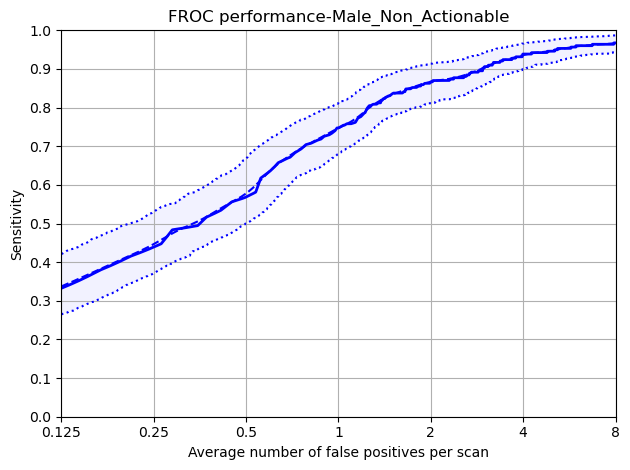

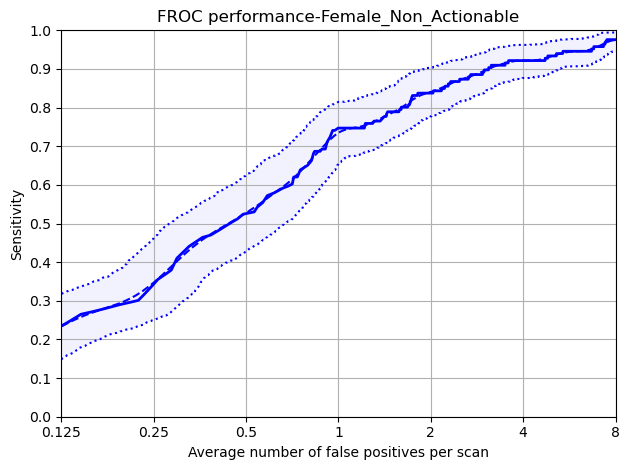

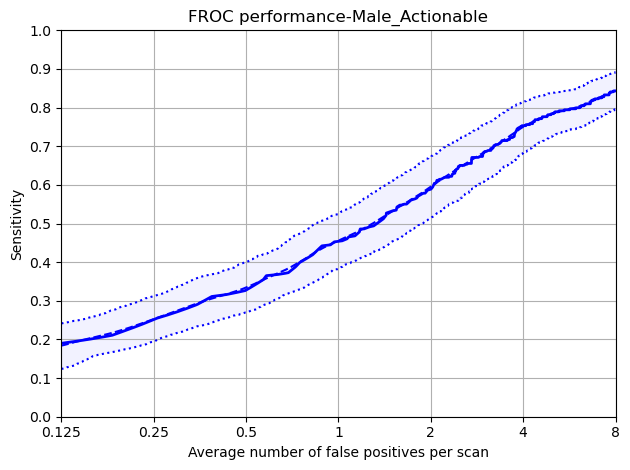

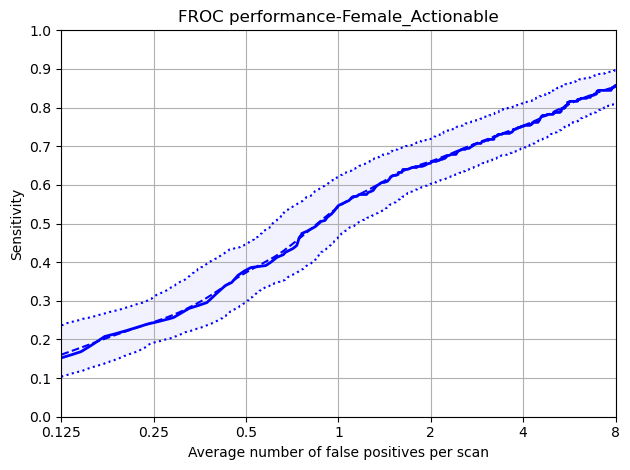

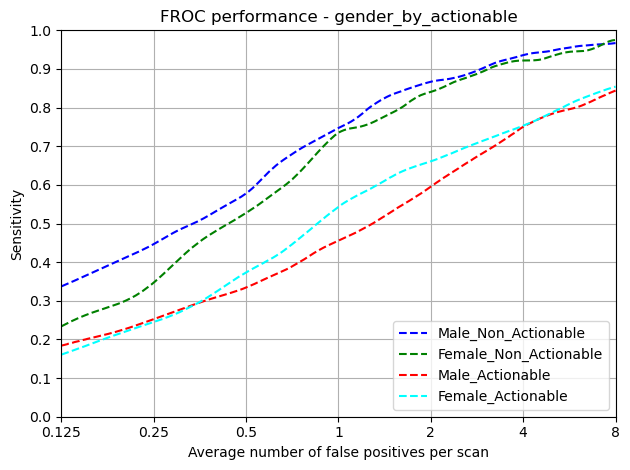

In [29]:
protected_group = 'gender_by_actionable'
data_dict = protected_group_analysis(
    protected_group, 
    scan_metadata, 
    annotations, 
    annotations_excluded, 
    predictions, 
    f'{workspace_path}/results/detection/trained_summit/summit/white_only/{protected_group}'
)


/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmpts4e2pg5/annotations.csv
Total number of included nodule annotations: 443
Total number of nodule annotations: 443
Cases: 603


100%|██████████| 1000/1000 [00:22<00:00, 43.88it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.30      0.24       0.36
159   0.25       0.41      0.34       0.48
476   0.50       0.56      0.50       0.63
1111  1.00       0.74      0.68       0.79
2381  2.00       0.85      0.81       0.89
4920  4.00       0.93      0.90       0.96
9999  8.00       0.97      0.95       0.98

Mean Sensitivity: 0.68 Low Sensitivity: 0.63 High Sensitivity: 0.73


True positives        440
0                                    False positives  18445.000
1                                    False negatives      3.000
2                                     True negatives      0.000
3                         Total number of candidates  19040.000
4                            Total number of nodules    443.000
5             Ignored candidates on excluded nodules      0.000
6      Ignored candidates which were double detec...    155.000
7                                        Sensitivity      0.993
8              Average number of candidates per scan     31.575

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/tmpm537w5j3/annotations.csv
Total number of included nodule annotations: 775
Total number of nodule annotations: 775
Cases: 297
This is strange: CAD mark None detected two nodules! Check for overlapping nodule annotations, SeriesUID: summit-8739-emz_Y0_BASELINE_A, nodule Annot ID: None


100%|██████████| 1000/1000 [00:14<00:00, 70.06it/s]


fps  mean_sens  low_sens  high_sens
0     0.12       0.17      0.13       0.21
159   0.25       0.25      0.21       0.29
476   0.50       0.35      0.30       0.40
1111  1.00       0.49      0.44       0.55
2381  2.00       0.63      0.58       0.68
4920  4.00       0.75      0.71       0.80
9999  8.00       0.85      0.82       0.88

Mean Sensitivity: 0.5 Low Sensitivity: 0.46 High Sensitivity: 0.54


True positives        737
0                                    False positives  13209.000
1                                    False negatives     38.000
2                                     True negatives      0.000
3                         Total number of candidates  14716.000
4                            Total number of nodules    775.000
5             Ignored candidates on excluded nodules      0.000
6      Ignored candidates which were double detec...    771.000
7                                        Sensitivity      0.951
8              Average number of candidates per scan     49.549

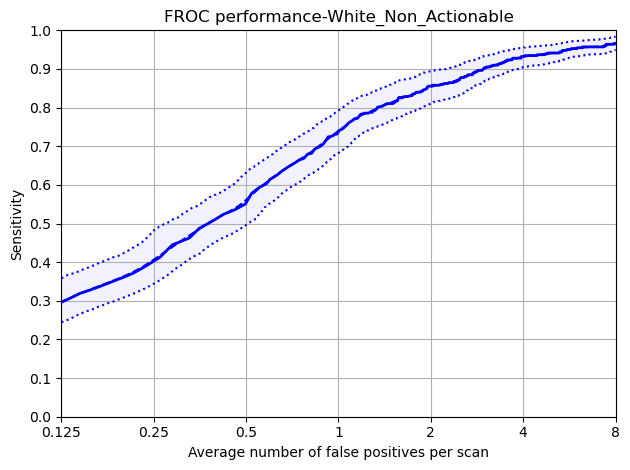

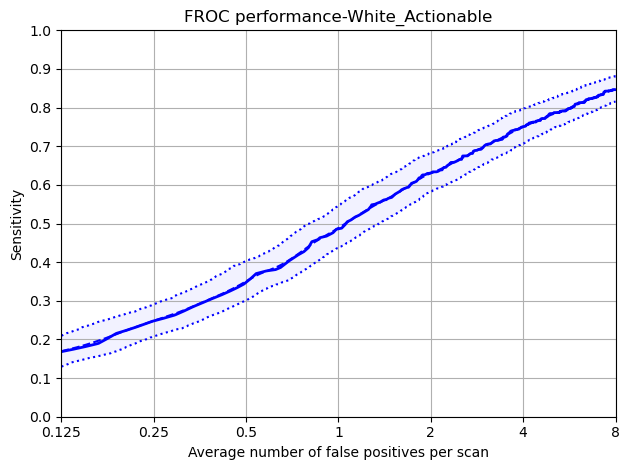

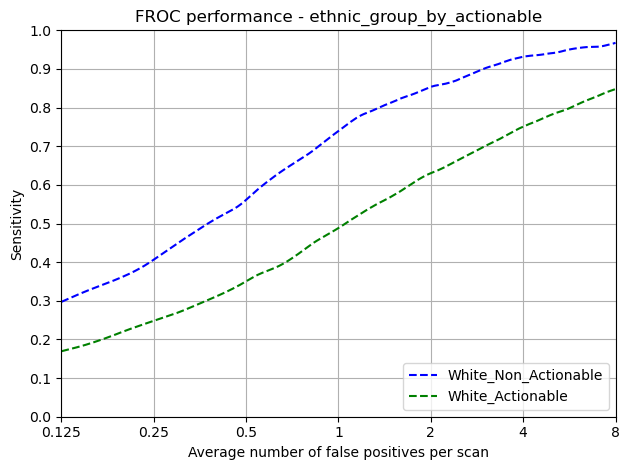

In [30]:
protected_group = 'ethnic_group_by_actionable'
data_dict = protected_group_analysis(
    protected_group, 
    scan_metadata, 
    annotations, 
    annotations_excluded, 
    predictions, 
    f'{workspace_path}/results/detection/trained_summit/summit/white_only/{protected_group}'
)



### False Positive and Miss Analysis


In [31]:
thresholds = get_thresholds(detection_summit_summit)
print(thresholds)
missed_metadata = miss_anaysis_at_fpps(
    scans_path=f'{workspace_path}/metadata/summit/white_only/test_scans.csv',
    annotations_path=f'{workspace_path}/models/detection/result/trained_summit/summit/white_only/annotations.csv',
    exclusions_path=f'{workspace_path}/data/summit/metadata/annotations_excluded_empty.csv',
    predictions_path=detection_predictions_path,
    thresholds=thresholds
)

[0.99755859375, 0.99609375, 0.99267578125, 0.9833984375, 0.953125, 0.84423828125, 0.495361328125]
/Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/result/trained_summit/summit/white_only/annotations.csv
Total number of included nodule annotations: 1218
Total number of nodule annotations: 1218
Cases: 899
Missed Annotations at 0.99755859375 FPPs: 1005
/Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/result/trained_summit/summit/white_only/annotations.csv
Total number of included nodule annotations: 1218
Total number of nodule annotations: 1218
Cases: 899
This is strange: CAD mark None detected two nodules! Check for overlapping nodule annotations, SeriesUID: summit-8739-emz_Y0_BASELINE_A, nodule Annot ID: None
Missed Annotations at 0.99609375 FPPs: 886
/Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/result/trained_summit/summit/white_only/annotations.csv
Total number of included nodule annotations: 1218
Total number of nodule anno

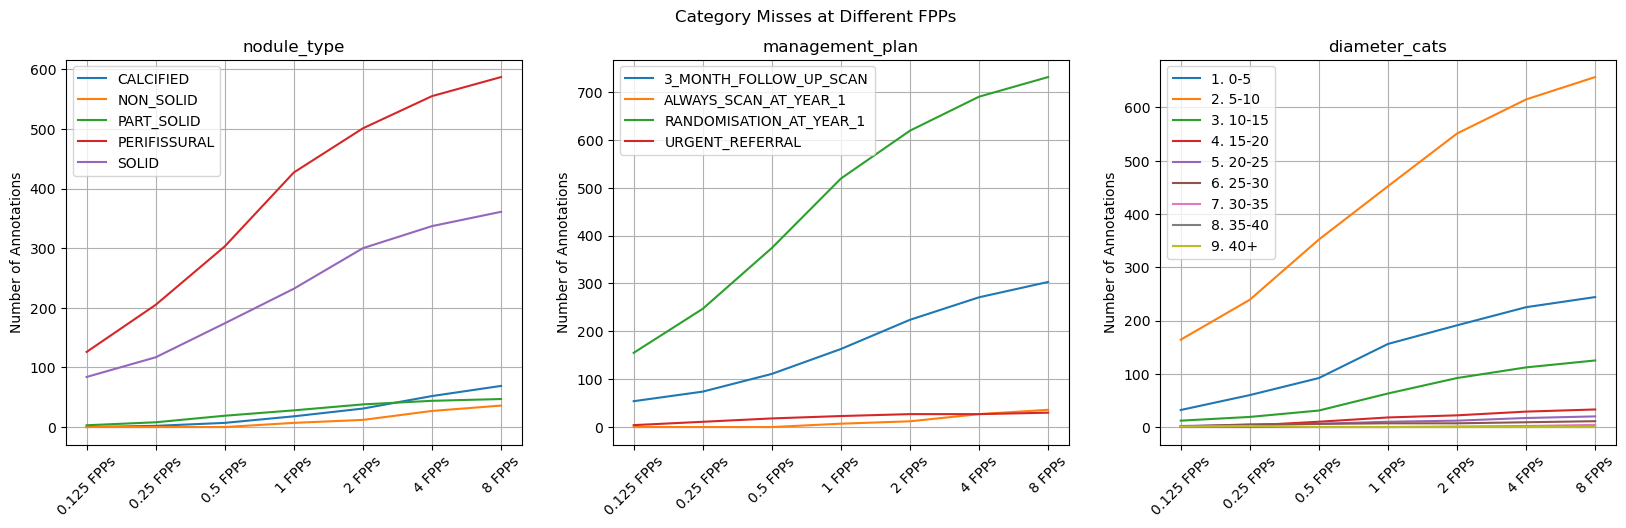

In [32]:

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for ivx, var in enumerate(['nodule_type','management_plan','diameter_cats']):
    annotations = pd.read_csv(f'{workspace_path}/models/detection/result/trained_summit/summit/white_only/annotations.csv')
    total_vc = annotations[var].value_counts().sort_index().rename('Total Annotations')

    operating_points = ['0.125', '0.25', '0.5', '1', '2', '4', '8']

    results = []
    for idx, metadata in enumerate(missed_metadata):
        vc = metadata[var].value_counts().sort_index()

        results.append((total_vc - vc).rename(f'{operating_points[idx]} FPPs'))

    df = pd.concat(results, axis=1).fillna(0).round(2)

    for column in df.T:
        ax[ivx].plot(df.T[column], label=column)
    
    ax[ivx].set_xticklabels(labels=df.columns, rotation=45)
    ax[ivx].set_title(var)
    ax[ivx].legend()
    ax[ivx].set_ylabel('Number of Annotations')
    ax[ivx].grid(visible=True, which='both')

plt.suptitle('Category Misses at Different FPPs')
plt.show()

FEMALE        MALE        Total
(CALCIFIED, 3_MONTH_FOLLOW_UP_SCAN)      40 (24.7%)  26 (14.9%)   66 (19.6%)
(NON_SOLID, ALWAYS_SCAN_AT_YEAR_1)       19 (11.7%)  31 (17.8%)   50 (14.9%)
(PART_SOLID, 3_MONTH_FOLLOW_UP_SCAN)      11 (6.8%)    4 (2.3%)    15 (4.5%)
(PERIFISSURAL, RANDOMISATION_AT_YEAR_1)  57 (35.2%)  64 (36.8%)  121 (36.0%)
(SOLID, 3_MONTH_FOLLOW_UP_SCAN)           15 (9.3%)  28 (16.1%)   43 (12.8%)
(SOLID, RANDOMISATION_AT_YEAR_1)          16 (9.9%)   15 (8.6%)    31 (9.2%)
(SOLID, URGENT_REFERRAL)                   4 (2.5%)    6 (3.4%)    10 (3.0%)
Total                                           162         174          336

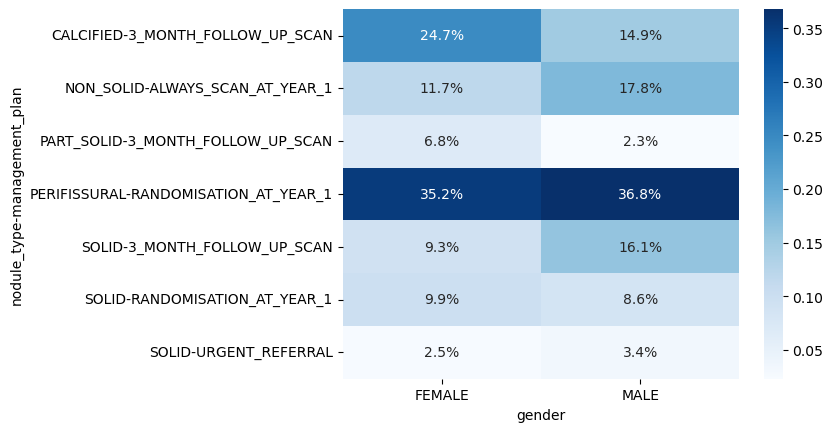

In [33]:
# Check what nodules have been missed by gender


missed_metadata_at_2fpps = missed_metadata[4]

def crosstab_with_percentages(rows, columns, x_order=None, y_order=None, table=False, heatmap=False):
    # Create the crosstab with absolutes
    cols = [c.astype(str) for c in columns]
    rows = [r.astype(str) for r in rows]

    xabs = pd.crosstab(rows, cols).fillna(0)
    xperc = pd.crosstab(rows, cols, normalize='columns').fillna(0)

    if x_order:
        xabs = xabs.reindex(x_order, axis=1)
        xperc = xperc.reindex(x_order, axis=1)

    if y_order:
        xabs = xabs.reindex(y_order)
        xperc = xperc.reindex(y_order)

    combined_data = {}

    for (adx, rabs), (pdx, rperc) in zip(xabs.iterrows(), xperc.iterrows()):

        row_data = {}
        row_total = 0

        for col in xabs.columns:
            row_data[col] = f"{rabs[col]} ({rperc[col]:.1%})"
            row_total += rabs[col]

        row_data['Total'] = f'{row_total} ({row_total / xabs.sum().sum():.1%})'
        combined_data[adx] = row_data

    row_data = {}
    row_total = 0
    for col in xabs.columns:
        row_data[col] = f'{sum(xabs[col])}'
        row_total += xabs[col].sum()

    row_data['Total'] = row_total
    combined_data['Total'] = row_data

    if table:
        display(pd.DataFrame.from_dict(combined_data).T)
        
    
    if heatmap:
        sns.heatmap(xperc, annot=True, fmt=".1%", cmap='Blues')
        plt.show()

    return xperc, pd.DataFrame.from_dict(combined_data)

_ = crosstab_with_percentages(
    [missed_metadata_at_2fpps['nodule_type'], missed_metadata_at_2fpps['management_plan']],
    [missed_metadata_at_2fpps['gender']],
    table=True,
    heatmap=True)

In [34]:
scans = pd.read_csv(f'{workspace_path}/metadata/summit/white_only/test_scans.csv')
predictions = pd.read_csv(detection_predictions_path)
annotations = pd.read_csv(f'{workspace_path}/models/detection/result/trained_summit/summit/white_only/annotations.csv')

false_positives_fpps = false_positive_analysis(
    thresholds=thresholds,    
    predictions=predictions,
    annotations=annotations
)

predictions: 299 at threshold: 0.99755859375
distance false positives: 86 at threshold: 0.99755859375
predictions: 517 at threshold: 0.99609375
distance false positives: 186 at threshold: 0.99609375
predictions: 924 at threshold: 0.99267578125
distance false positives: 422 at threshold: 0.99267578125
predictions: 1593 at threshold: 0.9833984375
distance false positives: 882 at threshold: 0.9833984375
predictions: 2671 at threshold: 0.953125
distance false positives: 1787 at threshold: 0.953125
predictions: 4616 at threshold: 0.84423828125
distance false positives: 3583 at threshold: 0.84423828125
predictions: 8369 at threshold: 0.495361328125
distance false positives: 7185 at threshold: 0.495361328125


summit-9838-nmx_Y0_BASELINE_A already exists
summit-9838-nmx_Y0_BASELINE_A - 186 152 196 6.328125
False Positive: True
IoU False Positive: nan


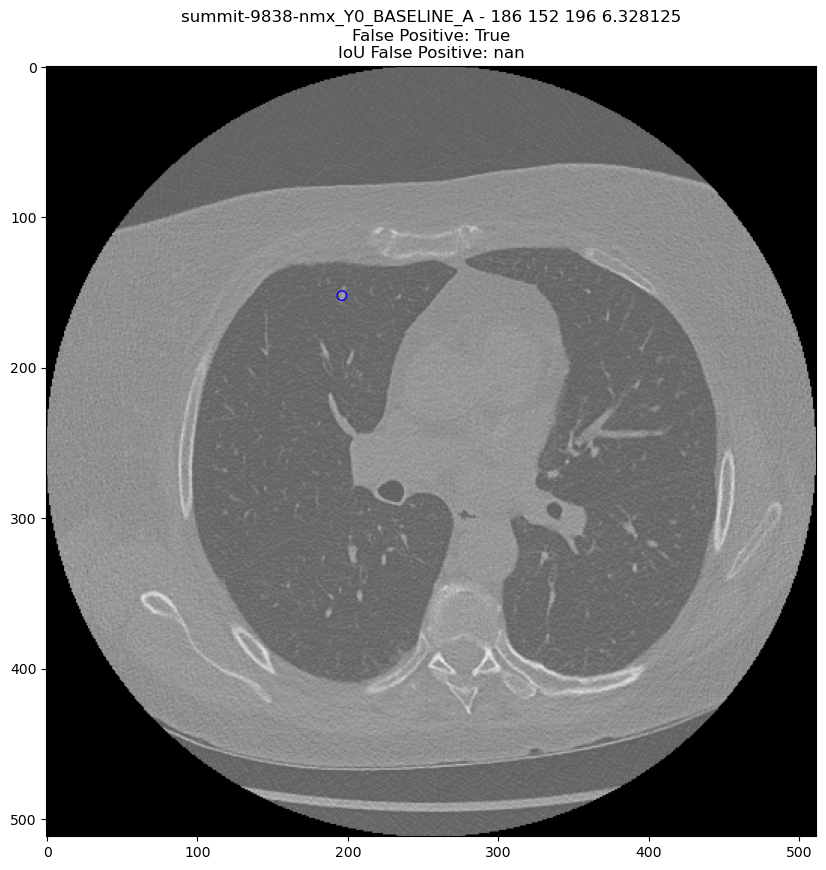

Connection closed by UNKNOWN port 65535
scp: Connection closed


None


RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /Users/runner/work/1/sitk/Code/IO/src/sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "/Users/john/Projects/SOTAEvaluationNoduleDetection/data/summit/scans/summit-8946-qqw/summit-8946-qqw_Y0_BASELINE_A.mhd" does not exist.

In [36]:
df = false_positives_fpps['0.125']

cnt = 0
for idx, row in df[df.distance_false_positive].sort_values(by='threshold', ascending=False).iterrows():
    scan_id = row['name']
    study_id = scan_id.split('_')[0]
    x = row['row']
    y = row['col']
    z = row['index']
    diameter = row['diameter']
    

    copy_scan_from_cluster(scan_id)
    scan = SummitScan.load_scan(f'{workspace_path}/data/summit/scans/{study_id}/{scan_id}.mhd')

    irc = xyz2irc([x, y, z], scan.origin, scan.voxel_size, scan.orientation)


    show_mhd_candidate_location(scan_id, scan.image, irc.row, irc.col, irc.index, diameter, row.distance_false_positive, row.iou_false_positive)
    cnt+=1
    if cnt == 12:
        break